<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1557536921.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1557536921.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     2.730120e+06
1     3.333932e+06
2     4.743915e+06
3     2.871986e+06
4     3.649480e+06
5     2.988750e+06
6     4.568262e+06
7     4.931064e+06
8     5.028326e+06
9     5.774337e+06
10    3.402789e+06
11    3.881077e+06
12    4.925515e+06
13    3.247982e+06
14    4.217962e+06
15    4.501855e+06
16    4.896393e+06
17    4.172760e+06
18    6.021245e+06
Name: Age_Solid, dtype: float64


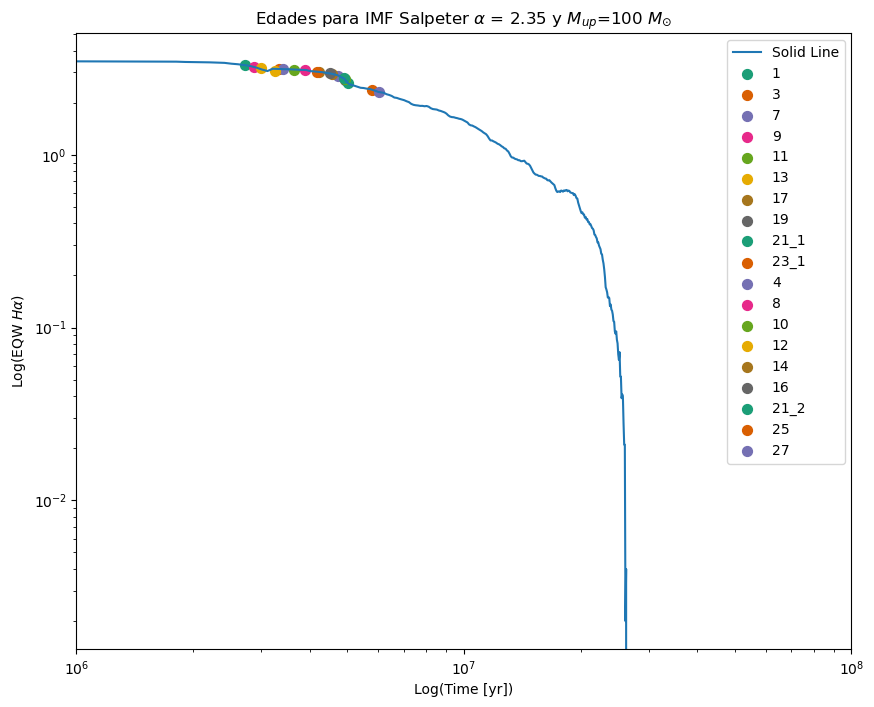

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'])

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])

eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_Solid'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', label='Solid Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_Solid'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()


/tmp/ipykernel_6910/1706341352.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     2.730120e+06
1     3.333932e+06
2     4.743915e+06
3     2.871986e+06
4     3.649480e+06
5     2.988750e+06
6     4.568262e+06
7     4.931064e+06
8     5.028326e+06
9     5.774337e+06
10    3.402789e+06
11    3.881077e+06
12    4.925515e+06
13    3.247982e+06
14    4.217962e+06
15    4.501855e+06
16    4.896393e+06
17    4.172760e+06
18    6.021245e+06
Name: Age_Solid, dtype: float64


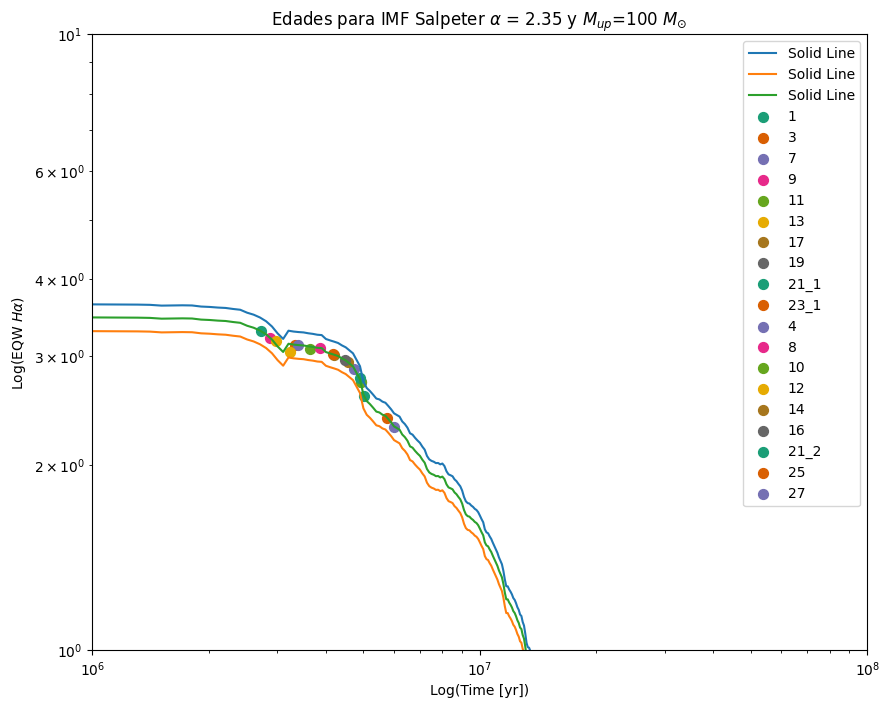

In [10]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
test = starburst_data['Solid']*1.05
test2 = starburst_data['Solid']*0.95

interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'])

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])


eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_Solid'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], test, '-', label='Solid Line')
plt.plot(starburst_data['Time'], test2, '-', label='Solid Line')

plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', label='Solid Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_Solid'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.ylim(1,10)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()


<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/80568765.py:45: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/80568765.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     7.197250e+06
1     2.480112e+06
2     4.207402e+06
3     3.407444e+06
4     2.797279e+06
5     1.347498e+06
6     3.881132e+06
7     4.812671e+06
8     4.985967e+06
9     5.776635e+06
10    2.493023e+06
11    2.736623e+06
12    4.796034e+06
13    2.910414e+06
14    2.997011e+06
15    3.758382e+06
16    4.733114e+06
17    2.979693e+06
18    6.027162e+06
Name: Age_LongDashed, dtype: float64


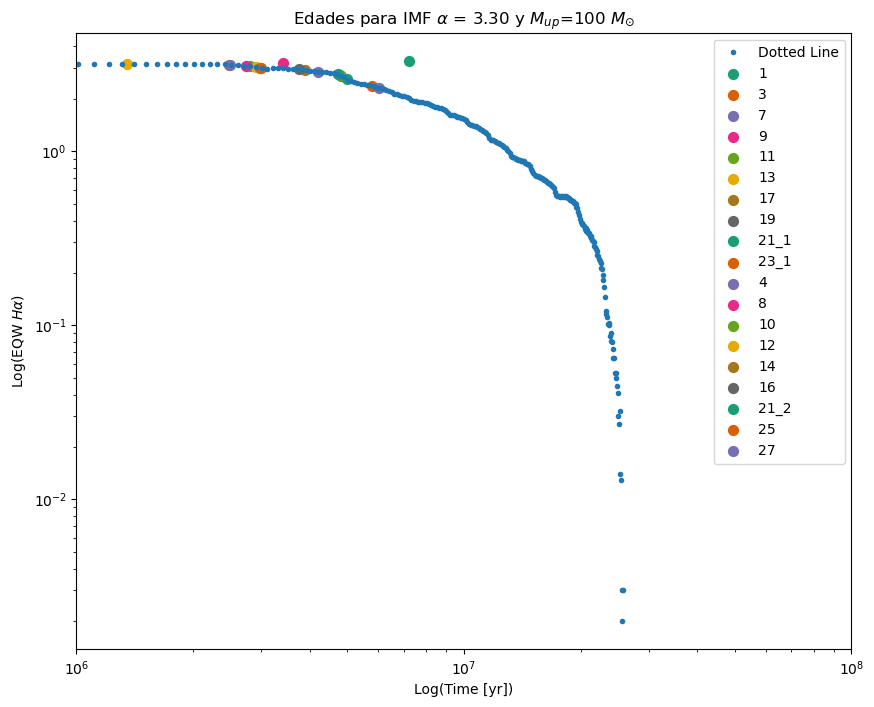

In [5]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['LongDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])

eqw_data['Age_LongDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))

print(eqw_data['Age_LongDashed'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['LongDashed'], '.', label='Dotted Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_LongDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()

<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1748176460.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1748176460.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     4.923350e+07
1     8.792300e+05
2     6.020961e+06
3     2.649467e+07
4     3.629330e+06
5     1.537250e+07
6     5.760755e+06
7     6.416041e+06
8     6.548583e+06
9     6.695912e+06
10    7.018358e+05
11    3.480463e+06
12    6.402776e+06
13    3.958870e+06
14    4.734054e+06
15    5.646551e+06
16    6.347321e+06
17    4.579027e+06
18    6.759645e+06
Name: Age_ShortDashed, dtype: float64


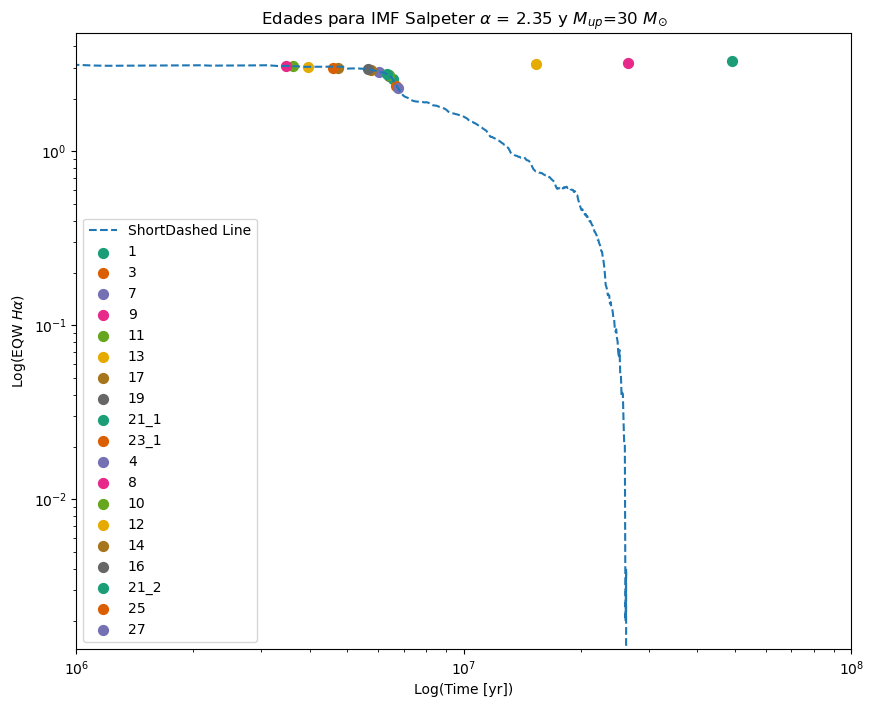

In [3]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['ShortDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])

eqw_data['Age_ShortDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_ShortDashed'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['ShortDashed'], '--', label='ShortDashed Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_ShortDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
plt.legend()
plt.show()

In [6]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Parámetros cosmológicos
H0 = 67.8  # Constante de Hubble en km/s/Mpc, de NED
Om0 = 0.308  # Densidad de materia en el universo plano (puedes ajustar según lo necesario)
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Redshift de la galaxia
z = 0.001568

# Calcular la distancia de luminosidad en Mpc
D = cosmo.angular_diameter_distance(z).value  # en Mpc

# Distancia angular en arcsec
# para las regiones SF observadas (de ds9)
theta_arcsec_4 = 219.844
theta_arcsec_8 = 186.082
theta_arcsec_10 = 189.255
theta_arcsec_12 = 164.417
theta_arcsec_14 = 243.849
theta_arcsec_16 = 246.580
theta_arcsec_21_2 = 219.152
theta_arcsec_25 = 193.262
theta_arcsec_27 = 219.101

theta_arcsec_1 = 70.135
theta_arcsec_3 = 77.639
theta_arcsec_5 = 80.253 #79.437 (cuando pongo línea al inicio de la SF region, si la pongo en la max intensidad de Ha entonces 80)
theta_arcsec_7 = 44.245
theta_arcsec_9 = 73.598
theta_arcsec_11 = 82.945
theta_arcsec_13 = 132.034
theta_arcsec_15 = 16.404
theta_arcsec_17 = 152.517
theta_arcsec_19 = 95.697
theta_arcsec_21 = 68.644
theta_arcsec_23 = 53.192

# Convertir arcsec a radianes

theta_rad_4 = theta_arcsec_4 * u.arcsec.to(u.radian)
theta_rad_8 = theta_arcsec_8 * u.arcsec.to(u.radian)
theta_rad_10 = theta_arcsec_10 * u.arcsec.to(u.radian)
theta_rad_12 = theta_arcsec_12 * u.arcsec.to(u.radian)
theta_rad_14 = theta_arcsec_14 * u.arcsec.to(u.radian)
theta_rad_16 = theta_arcsec_16 * u.arcsec.to(u.radian)
theta_rad_21_2 = theta_arcsec_21_2 * u.arcsec.to(u.radian)
theta_rad_25 = theta_arcsec_25 * u.arcsec.to(u.radian)
theta_rad_27 = theta_arcsec_27 * u.arcsec.to(u.radian)

theta_rad_1 = theta_arcsec_1 * u.arcsec.to(u.radian)
theta_rad_3 = theta_arcsec_3 * u.arcsec.to(u.radian)
theta_rad_5 = theta_arcsec_5 * u.arcsec.to(u.radian)
theta_rad_7 = theta_arcsec_7 * u.arcsec.to(u.radian)
theta_rad_9 = theta_arcsec_9 * u.arcsec.to(u.radian)
theta_rad_11 = theta_arcsec_11 * u.arcsec.to(u.radian)
theta_rad_13 = theta_arcsec_13 * u.arcsec.to(u.radian)
theta_rad_15 = theta_arcsec_15 * u.arcsec.to(u.radian)
theta_rad_17 = theta_arcsec_17 * u.arcsec.to(u.radian)
theta_rad_19 = theta_arcsec_19 * u.arcsec.to(u.radian)
theta_rad_21 = theta_arcsec_21 * u.arcsec.to(u.radian)
theta_rad_23 = theta_arcsec_23 * u.arcsec.to(u.radian)

# Calcular la distancia física en kpc
d_kpc_4 = D * theta_rad_4 * 1000
d_kpc_8 = D * theta_rad_8 * 1000
d_kpc_10 = D * theta_rad_10 * 1000
d_kpc_12 = D * theta_rad_12 * 1000
d_kpc_14 = D * theta_rad_14 * 1000
d_kpc_16 = D * theta_rad_16 * 1000
d_kpc_21_2 = D * theta_rad_21_2 * 1000
d_kpc_25 = D * theta_rad_25 * 1000
d_kpc_27 = D * theta_rad_27 * 1000

d_kpc_1 = D * theta_rad_1 * 1000  # Convertir Mpc a kpc
d_kpc_3 = D * theta_rad_3 * 1000
d_kpc_5 = D * theta_rad_5 * 1000
d_kpc_7 = D * theta_rad_7 * 1000
d_kpc_9 = D * theta_rad_9 * 1000
d_kpc_11 = D * theta_rad_11 * 1000
d_kpc_13 = D * theta_rad_13 * 1000
d_kpc_15 = D * theta_rad_15 * 1000
d_kpc_17 = D * theta_rad_17 * 1000
d_kpc_19 = D * theta_rad_19 * 1000
d_kpc_21 = D * theta_rad_21 * 1000
d_kpc_23 = D * theta_rad_23 * 1000

print(f"Distancia física desde slit 4 al centro de NGC1313: {d_kpc_4:.3f} kpc")
print(f"Distancia física desde slit 8 al centro de NGC1313: {d_kpc_8:.3f} kpc")
print(f"Distancia física desde slit 10 al centro de NGC1313: {d_kpc_10:.3f} kpc")
print(f"Distancia física desde slit 12 al centro de NGC1313: {d_kpc_12:.3f} kpc")
print(f"Distancia física desde slit 14 al centro de NGC1313: {d_kpc_14:.3f} kpc")
print(f"Distancia física desde slit 16 al centro de NGC1313: {d_kpc_16:.3f} kpc")
print(f"Distancia física desde slit 21_2 al centro de NGC1313: {d_kpc_21_2:.3f} kpc")
print(f"Distancia física desde slit 25 al centro de NGC1313: {d_kpc_25:.3f} kpc")
print(f"Distancia física desde slit 27 al centro de NGC1313: {d_kpc_27:.3f} kpc")

print(f"Distancia física desde slit 1 al centro de NGC1313: {d_kpc_1:.3f} kpc")
print(f"Distancia física desde slit 3 al centro de NGC1313: {d_kpc_3:.3f} kpc")
print(f"Distancia física desde slit 5 al centro de NGC1313: {d_kpc_5:.3f} kpc")
print(f"Distancia física desde slit 7 al centro de NGC1313: {d_kpc_7:.3f} kpc")
print(f"Distancia física desde slit 9 al centro de NGC1313: {d_kpc_9:.3f} kpc")
print(f"Distancia física desde slit 11 al centro de NGC1313: {d_kpc_11:.3f} kpc")
print(f"Distancia física desde slit 13 al centro de NGC1313: {d_kpc_13:.3f} kpc")
print(f"Distancia física desde slit 15 al centro de NGC1313: {d_kpc_15:.3f} kpc")
print(f"Distancia física desde slit 17 al centro de NGC1313: {d_kpc_17:.3f} kpc")
print(f"Distancia física desde slit 19 al centro de NGC1313: {d_kpc_19:.3f} kpc")
print(f"Distancia física desde slit 21 al centro de NGC1313: {d_kpc_21:.3f} kpc")
print(f"Distancia física desde slit 23 al centro de NGC1313: {d_kpc_23:.3f} kpc")

Distancia física desde slit 4 al centro de NGC1313: 7.375 kpc
Distancia física desde slit 8 al centro de NGC1313: 6.243 kpc
Distancia física desde slit 10 al centro de NGC1313: 6.349 kpc
Distancia física desde slit 12 al centro de NGC1313: 5.516 kpc
Distancia física desde slit 14 al centro de NGC1313: 8.181 kpc
Distancia física desde slit 16 al centro de NGC1313: 8.272 kpc
Distancia física desde slit 21_2 al centro de NGC1313: 7.352 kpc
Distancia física desde slit 25 al centro de NGC1313: 6.484 kpc
Distancia física desde slit 27 al centro de NGC1313: 7.351 kpc
Distancia física desde slit 1 al centro de NGC1313: 2.353 kpc
Distancia física desde slit 3 al centro de NGC1313: 2.605 kpc
Distancia física desde slit 5 al centro de NGC1313: 2.692 kpc
Distancia física desde slit 7 al centro de NGC1313: 1.484 kpc
Distancia física desde slit 9 al centro de NGC1313: 2.469 kpc
Distancia física desde slit 11 al centro de NGC1313: 2.783 kpc
Distancia física desde slit 13 al centro de NGC1313: 4.430 k

new
slit1: 67.959 arcsec
slit3: 75.586 arcsec
slit5: 76.600 arcsec
slit7: 42.141 arcsec
slit9: 



hacerlo cuando tenga tiempo, ahora sólo calcularé los nuevos, sin embargo, lo ideal es calcularlos todos igual

slit 4: 219.844 arcsec
slit 10: 189.255 arsec
slit 12: 164.417 arcsec
slit 21_2: 219.152
slit 25: 193.262

In [1]:
import pandas as pd
import numpy as np

# Cargar los datos
df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19,20,21,22,23])

# Aplicar el factor 10^-15 al flujo de H alfa
df['H_ALPHA_FLUX'] *= 1e-15

# La distancia en Mpc
distance_mpc = 4.1

# Constantes
distance_cm = distance_mpc * 3.086e24  # Convertir Mpc a cm
kenn_ratio = 7.9e-42  # Kennicutt 98 ratio en M_sun/yr/(erg/s)

# Calcular la luminosidad L en erg/s
df['L_H_ALPHA'] = df['H_ALPHA_FLUX'] * 4 * np.pi * distance_cm**2

# Calcular la SFR usando Kennicutt 98
df['SFR'] = df['L_H_ALPHA'] * kenn_ratio

# Mostrar el resultado
df['H_ALPHA_FLUX'],df['L_H_ALPHA'],df['SFR']

(0     2.574884e-13
 1     4.616594e-14
 2     3.873912e-14
 3     8.354096e-14
 4     1.426157e-13
 5     8.003813e-14
 6     3.015209e-14
 7     2.125748e-14
 8     3.109344e-14
 9     1.028192e-14
 10    3.201929e-14
 11    1.743460e-14
 12    4.562292e-15
 13    2.809194e-15
 14    1.928537e-14
 15    1.250614e-14
 16    2.780142e-15
 17    1.629613e-15
 18    1.400273e-15
 Name: H_ALPHA_FLUX, dtype: float64,
 0     5.179969e+38
 1     9.287335e+37
 2     7.793261e+37
 3     1.680618e+38
 4     2.869040e+38
 5     1.610150e+38
 6     6.065782e+37
 7     4.276428e+37
 8     6.255156e+37
 9     2.068443e+37
 10    6.441413e+37
 11    3.507368e+37
 12    9.178094e+36
 13    5.651336e+36
 14    3.879693e+37
 15    2.515896e+37
 16    5.592892e+36
 17    3.278339e+36
 18    2.816969e+36
 Name: L_H_ALPHA, dtype: float64,
 0     0.004092
 1     0.000734
 2     0.000616
 3     0.001328
 4     0.002267
 5     0.001272
 6     0.000479
 7     0.000338
 8     0.000494
 9     0.000163
 10    0.

In [7]:
df['L_H_ALPHA'].median()

4.276428350792781e+37

In [2]:
df['L_H_ALPHA']

0     5.179969e+38
1     9.287335e+37
2     7.793261e+37
3     1.680618e+38
4     2.869040e+38
5     1.610150e+38
6     6.065782e+37
7     4.276428e+37
8     6.255156e+37
9     2.068443e+37
10    6.441413e+37
11    3.507368e+37
12    9.178094e+36
13    5.651336e+36
14    3.879693e+37
15    2.515896e+37
16    5.592892e+36
17    3.278339e+36
18    2.816969e+36
Name: L_H_ALPHA, dtype: float64

In [8]:
df['SFR']

0     0.004092
1     0.000734
2     0.000616
3     0.001328
4     0.002267
5     0.001272
6     0.000479
7     0.000338
8     0.000494
9     0.000163
10    0.000509
11    0.000277
12    0.000073
13    0.000045
14    0.000306
15    0.000199
16    0.000044
17    0.000026
18    0.000022
Name: SFR, dtype: float64

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3722/1517553335.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


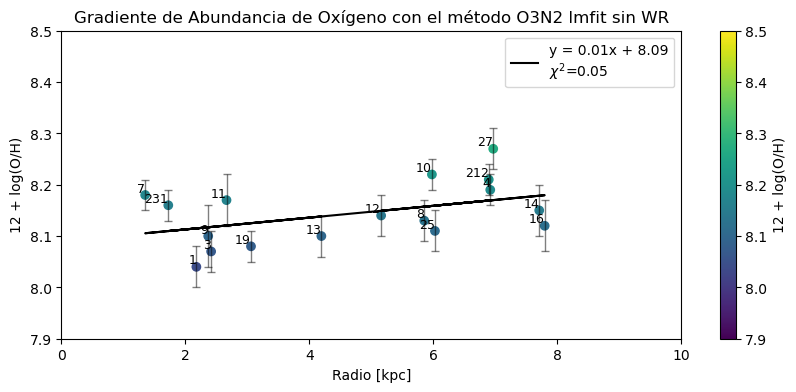

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano.csv', delimiter=',')
df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.5)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit sin WR')
plt.xlim(0, 10)
plt.ylim(7.9, 8.5)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3722/2653676965.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


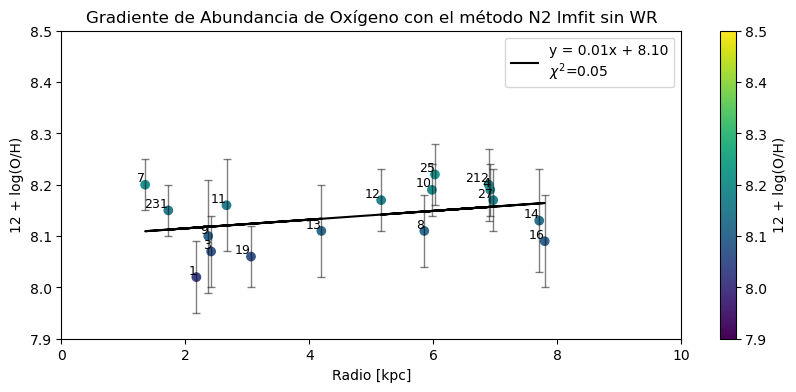

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano.csv', delimiter=',')
df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.5)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit sin WR')
plt.xlim(0, 10)
plt.ylim(7.9, 8.5)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1032/1042221619.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


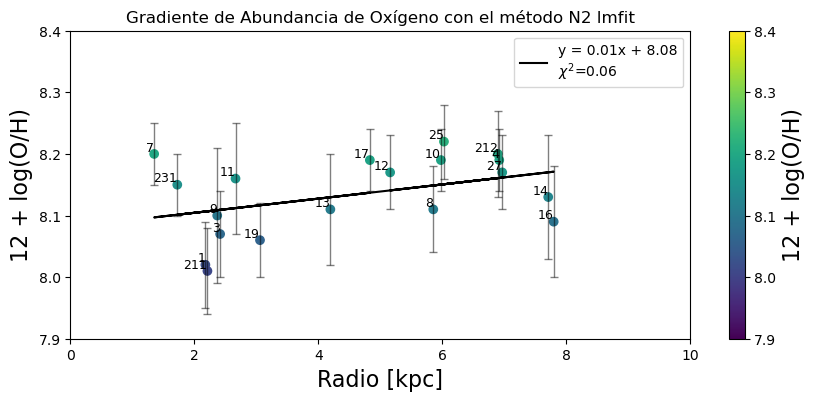

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano.csv', delimiter=',')
#df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)',fontsize=16)
plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_985/786612703.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


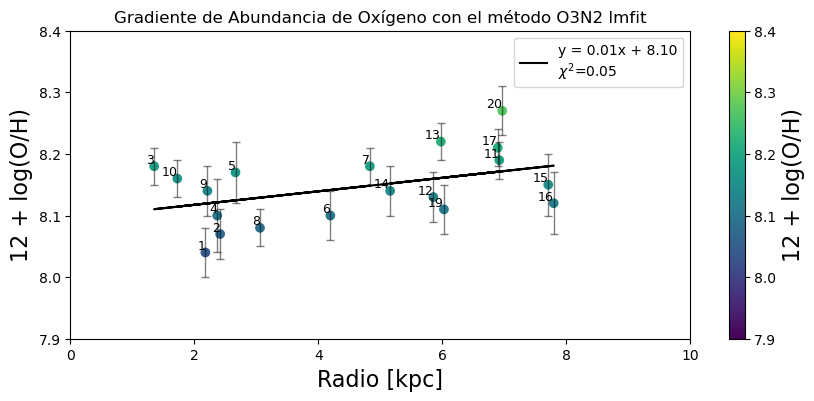

In [2]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_newnumber.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:36: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:36: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1973503878.py:36: SyntaxWarning: invalid escape sequence '\o'
  cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1973503878.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


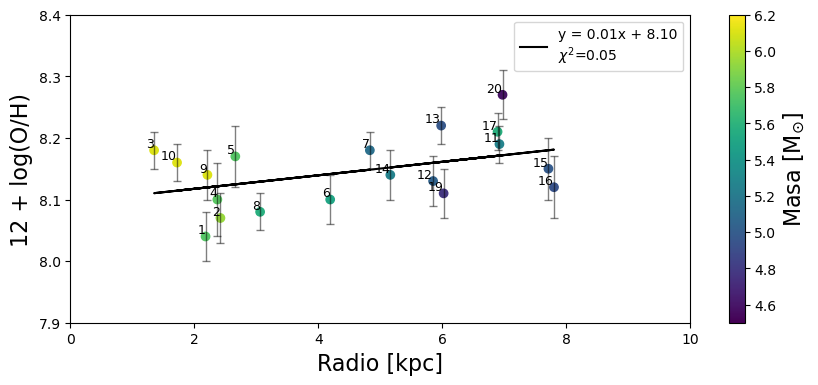

In [1]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['mass'], cmap='viridis', vmin=4.5, vmax=6.2)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1625501115.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


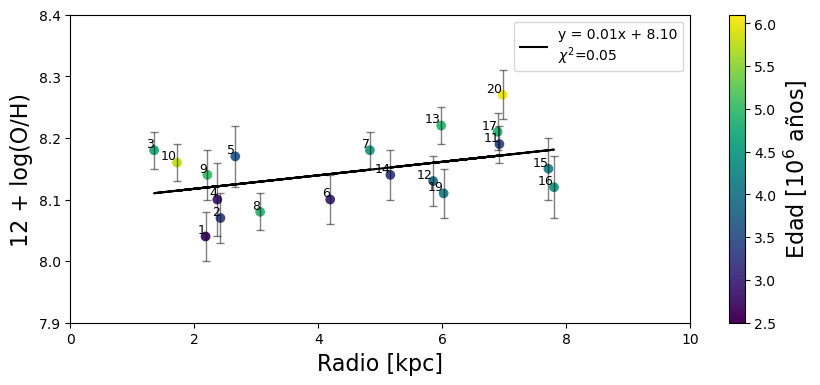

In [3]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['age'], cmap='viridis', vmin=2.5, vmax=6.1)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Edad [10$^6$ años]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1540252366.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


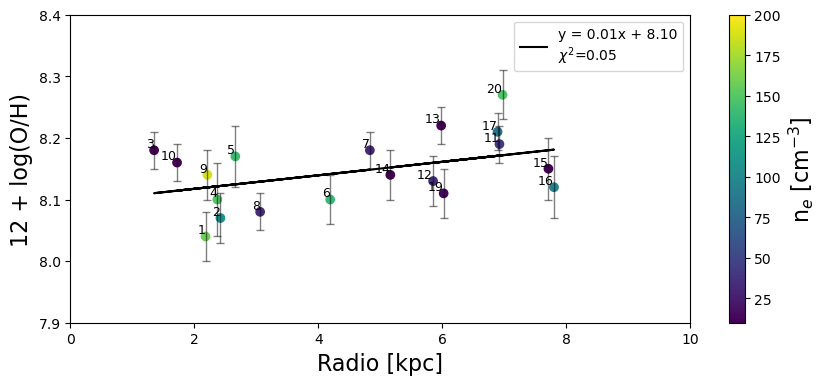

In [4]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['n_e'], cmap='viridis', vmin=10, vmax=200)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/3222999601.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


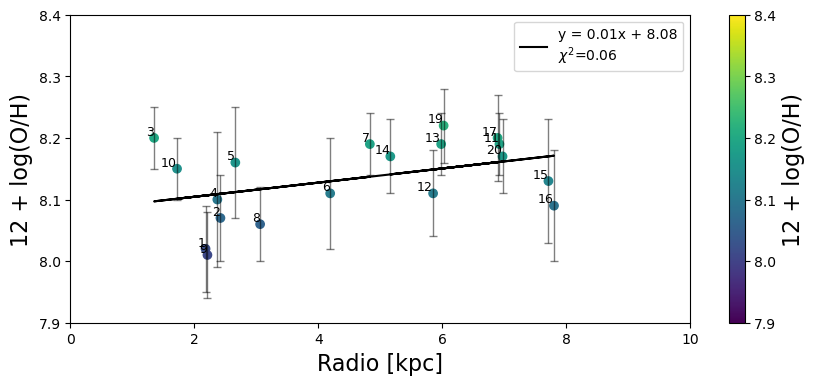

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
#df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)',fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:35: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1820120227.py:35: SyntaxWarning: invalid escape sequence '\o'
  cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1820120227.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


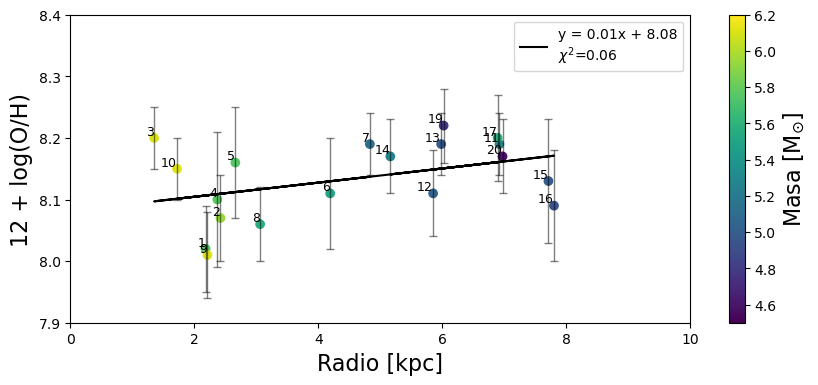

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
#df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['mass'], cmap='viridis', vmin=4.5, vmax=6.2)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)',fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1020517126.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


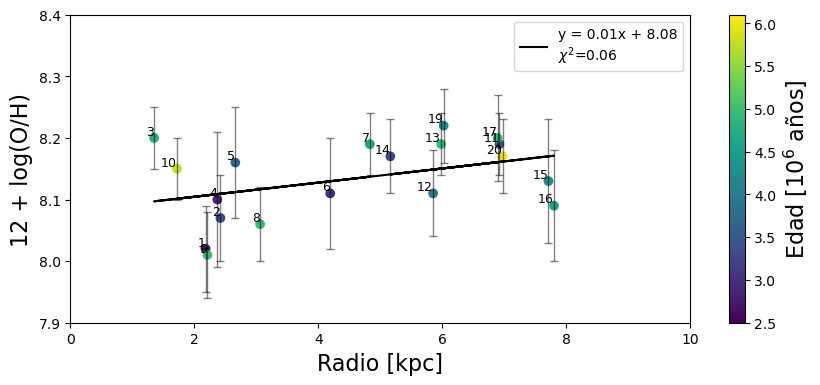

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
#df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['age'], cmap='viridis', vmin=2.5, vmax=6.1)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Edad [10$^6$ años]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)',fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['n_e'], cmap='viridis', vmin=10, vmax=200)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/715777005.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


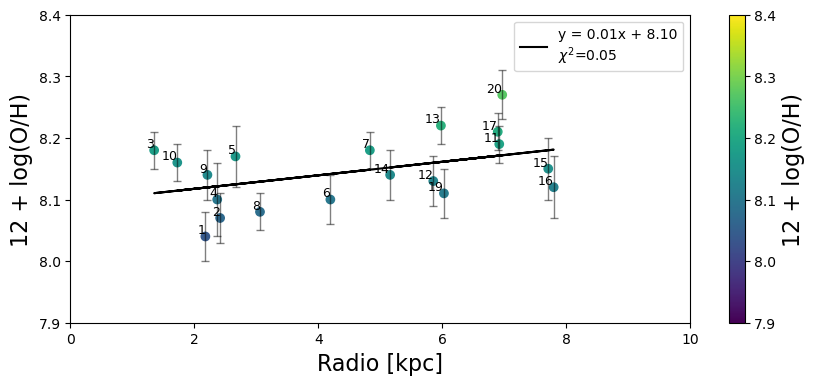

In [11]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_newnumber.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

In [7]:
#gradiente test galactocéntricoimport pandas as pd
import numpy as np

# Cargar los datos de posiciones
df_pos = pd.read_csv('output_scarano.csv', delimiter=',')

# Convertir theta_deg a radianes
theta_rad = np.deg2rad(df_pos['theta_deg'])

# Calcular coordenadas cartesianas x_kpc y y_kpc
x_kpc = df_pos['r_kpc'] * np.sin(theta_rad)
y_kpc = df_pos['r_kpc'] * np.cos(theta_rad)

# Centrar los datos para PCA
x_mean = np.mean(x_kpc)
y_mean = np.mean(y_kpc)
x_centered = x_kpc - x_mean
y_centered = y_kpc - y_mean

# Matriz de covarianza
cov_matrix = np.cov(x_centered, y_centered)

# Calcular autovalores y autovectores
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Ordenar por autovalores descendentes
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# El primer autovector es la dirección del eje principal
major_axis = eig_vecs[:, 0]

# Calcular la distancia con signo a lo largo del eje principal
signed_distance = x_kpc * major_axis[0] + y_kpc * major_axis[1]

# Agregar la distancia con signo al DataFrame
df_pos['signed_distance_kpc'] = signed_distance

# Guardar el resultado en un nuevo archivo CSV
df_pos[['ID', 'signed_distance_kpc']].to_csv('signed_distances.csv', index=False)

print("Distancias con signo calculadas y guardadas en 'signed_distances.csv'")

Distancias con signo calculadas y guardadas en 'signed_distances.csv'


<>:44: SyntaxWarning: invalid escape sequence '\c'
<>:44: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1431/3061311862.py:44: SyntaxWarning: invalid escape sequence '\c'
  color='black', label=f"y = {slope:.3f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


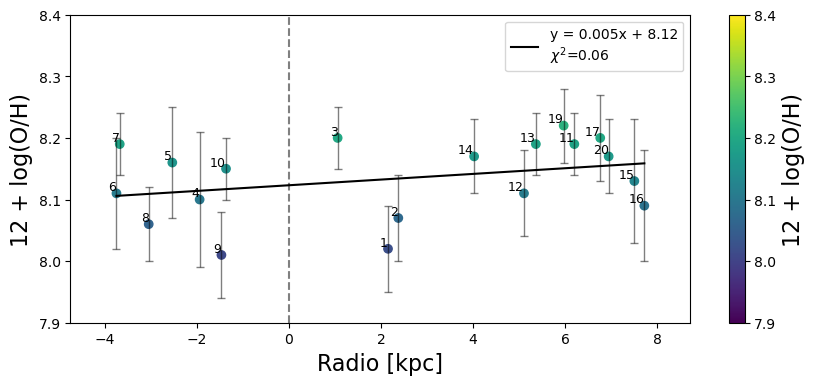

In [7]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

# Cargar los datos de abundancia y distancias con signo
df_abund = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')

# Unir los DataFrames usando la columna ID
df = pd.merge(df_abund, df_signed, on='ID')

# Definir la función lineal para el ajuste
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo y ajustar los datos
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['signed_distance_kpc'], slope=-0.1, intercept=8.2)

# Extraer los parámetros ajustados
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['signed_distance_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], 
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con colorbar
sc = plt.scatter(df['signed_distance_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], 
                 cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)', fontsize=16)

# Graficar la línea de regresión ajustada
sorted_idx = np.argsort(df['signed_distance_kpc'])
plt.plot(df['signed_distance_kpc'][sorted_idx], result.best_fit[sorted_idx], 
         color='black', label=f"y = {slope:.3f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas con los IDs
for i, row in df.iterrows():
    plt.text(row['signed_distance_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), 
             fontsize=9, ha='right', va='bottom')

# Etiquetas y límites
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.axvline(x=0, linestyle='--', color='gray', zorder=0)
plt.xlim(min(df['signed_distance_kpc']) - 1, max(df['signed_distance_kpc']) + 1)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:40: SyntaxWarning: invalid escape sequence '\c'
<>:40: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1431/4130371054.py:40: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.3f}")


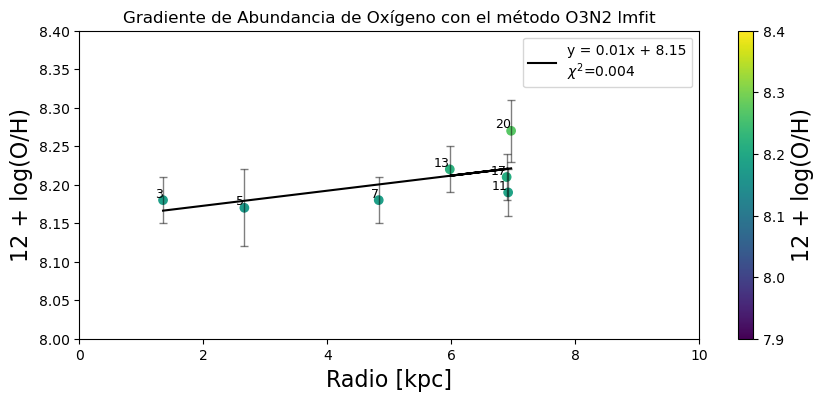

In [15]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_newnumber.csv', delimiter=',')
df = df.drop(index=[0,1,3,5,7,8,9,11,13,14,15,17])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.3f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(8.0, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:45: SyntaxWarning: invalid escape sequence '\c'
<>:45: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1431/2585002185.py:45: SyntaxWarning: invalid escape sequence '\c'
  color='black', label=f"y = {slope:.3f}x + {intercept:.2f}\n$\chi^2$={chi_square:.3f}")


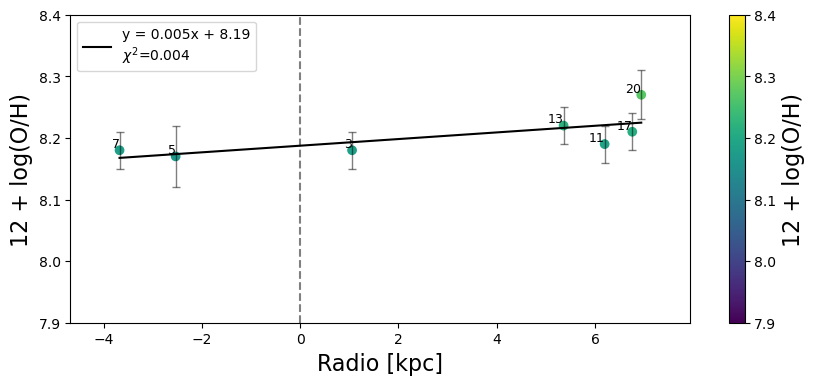

In [14]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

# Cargar los datos de abundancia y distancias con signo
df_abund_O3N2 = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
df_abund_O3N2 = df_abund_O3N2.drop(index=[0,1,3,5,7,8,9,11,13,14,15,17])
df_signed_O3N2 = pd.read_csv('signed_distances.csv', delimiter=',')

# Unir los DataFrames usando la columna ID
df_O3N2 = pd.merge(df_abund_O3N2, df_signed_O3N2, on='ID')

# Definir la función lineal para el ajuste
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo y ajustar los datos
model = Model(linear)
result = model.fit(df_O3N2['12_LOG_OH_O3N2'], x=df_O3N2['signed_distance_kpc'], slope=-0.1, intercept=8.2)

# Extraer los parámetros ajustados
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df_O3N2['signed_distance_kpc'], df_O3N2['12_LOG_OH_O3N2'], yerr=df_O3N2['12_LOG_OH_O3N2_ERR'], 
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con colorbar
sc_O3N2 = plt.scatter(df_O3N2['signed_distance_kpc'], df_O3N2['12_LOG_OH_O3N2'], c=df_O3N2['12_LOG_OH_O3N2'], 
                 cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc_O3N2)
cbar.set_label('12 + log(O/H)', fontsize=16)

# Graficar la línea de regresión ajustada
sorted_idx = np.argsort(df_O3N2['signed_distance_kpc'])
plt.plot(df_O3N2['signed_distance_kpc'][sorted_idx], result.best_fit[sorted_idx], 
         color='black', label=f"y = {slope:.3f}x + {intercept:.2f}\n$\chi^2$={chi_square:.3f}")

# Añadir etiquetas con los IDs
for i, row in df_O3N2.iterrows():
    plt.text(row['signed_distance_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), 
             fontsize=9, ha='right', va='bottom')

# Etiquetas y límites
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.axvline(x=0, linestyle='--', color='gray', zorder=0)
plt.xlim(min(df_O3N2['signed_distance_kpc']) - 1, max(df_O3N2['signed_distance_kpc']) + 1)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/559951708.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


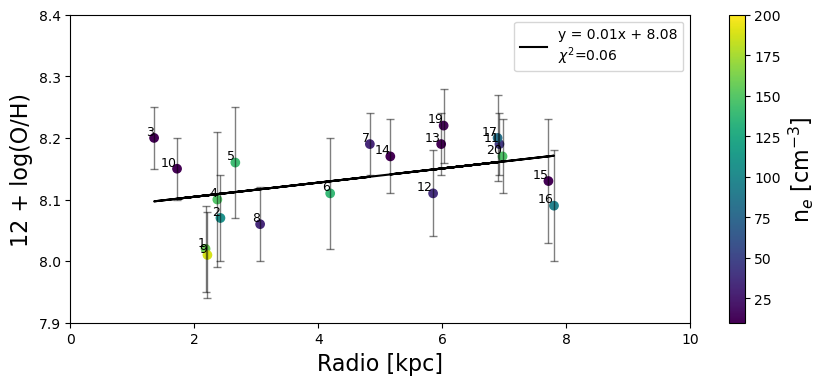

In [4]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['n_e'], cmap='viridis', vmin=10, vmax=200)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit y densidad electronica')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:49: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:49: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/2465770178.py:49: SyntaxWarning: invalid escape sequence '\c'
  label=f"izquierda: y = {result_left.params['slope'].value:.3f}x + {result_left.params['intercept'].value:.2f}\n$\chi^2$={result_left.chisqr:.2f}")
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/2465770178.py:54: SyntaxWarning: invalid escape sequence '\c'
  label=f"derecha: y = {result_right.params['slope'].value:.3f}x + {result_right.params['intercept'].value:.2f}\n$\chi^2$={result_right.chisqr:.2f}")
/Users/belen/opt/anaconda3/lib/python3.12/site-packages/lmfit/model.py:1123: UserWarning: The keyword argument yerr does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +


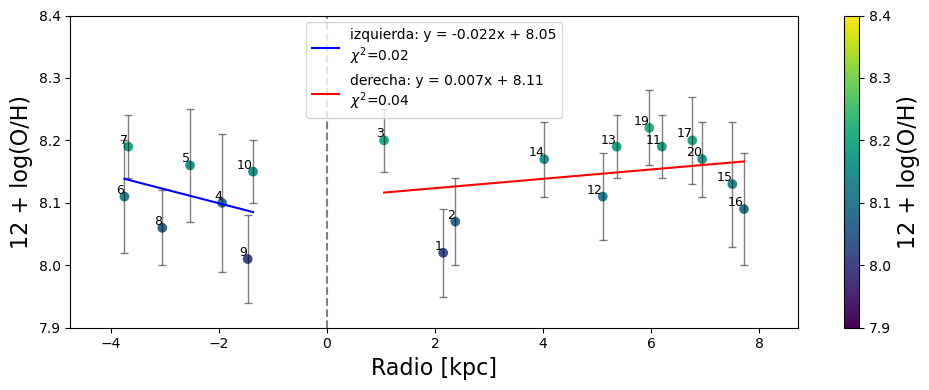

In [5]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

# Cargar los datos de abundancia y distancias con signo
df_abund = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')

# Unir los DataFrames usando la columna ID
df = pd.merge(df_abund, df_signed, on='ID')

# Separar en dos subconjuntos: distancias negativas y positivas
df_left = df[df['signed_distance_kpc'] < 0]
df_right = df[df['signed_distance_kpc'] >= 0]

# Definir la función lineal para el ajuste
def linear(x, slope, intercept):
    return slope * x + intercept

model = Model(linear)

# Ajuste para la izquierda (distancias negativas)
result_left = model.fit(df_left['12_LOG_OH_N2'], x=df_left['signed_distance_kpc'],
                        yerr=df_left['12_LOG_OH_N2_ERR'], slope=-0.1, intercept=8.2)

# Ajuste para la derecha (distancias positivas)
result_right = model.fit(df_right['12_LOG_OH_N2'], x=df_right['signed_distance_kpc'],
                         yerr=df_right['12_LOG_OH_N2_ERR'], slope=-0.1, intercept=8.2)

# Gráfico
plt.figure(figsize=(10, 4))

# Barras de error
plt.errorbar(df['signed_distance_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'],
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot
sc = plt.scatter(df['signed_distance_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'],
                 cmap='viridis', vmin=7.9, vmax=8.4)

# Colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)', fontsize=16)

# Línea ajustada para la izquierda
x_left_sorted = np.sort(df_left['signed_distance_kpc'])
plt.plot(x_left_sorted, result_left.eval(x=x_left_sorted), color='blue',
         label=f"izquierda: y = {result_left.params['slope'].value:.3f}x + {result_left.params['intercept'].value:.2f}\n$\chi^2$={result_left.chisqr:.2f}")

# Línea ajustada para la derecha
x_right_sorted = np.sort(df_right['signed_distance_kpc'])
plt.plot(x_right_sorted, result_right.eval(x=x_right_sorted), color='red',
         label=f"derecha: y = {result_right.params['slope'].value:.3f}x + {result_right.params['intercept'].value:.2f}\n$\chi^2$={result_right.chisqr:.2f}")

# IDs de los puntos
for i, row in df.iterrows():
    plt.text(row['signed_distance_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])),
             fontsize=9, ha='right', va='bottom')

# Estética del gráfico
plt.axvline(x=0, linestyle='--', color='gray')
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(min(df['signed_distance_kpc']) - 1, max(df['signed_distance_kpc']) + 1)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/2973927852.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


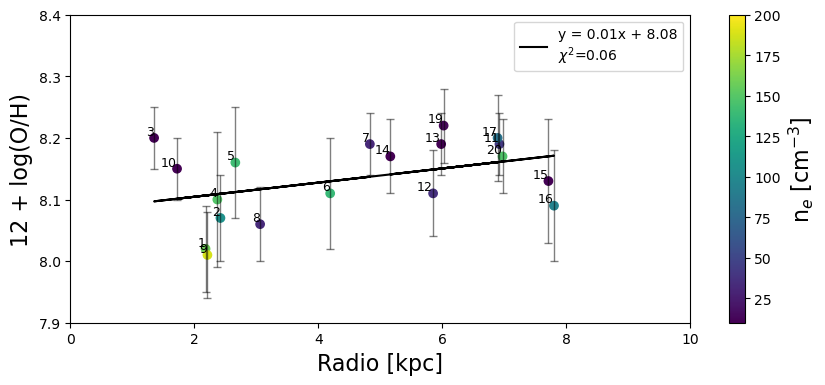

In [6]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=0.01, intercept=8.1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['n_e'], cmap='viridis', vmin=10, vmax=200)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit y densidad electronica')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

/Users/belen/opt/anaconda3/lib/python3.12/site-packages/lmfit/model.py:1123: UserWarning: The keyword argument yerr does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +


=== AJUSTE LADO IZQUIERDO (x < 0) ===
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02014409
    reduced chi-square = 0.00402882
    Akaike info crit   = -36.9552817
    Bayesian info crit = -37.0634614
    R-squared          = 0.12742188
[[Variables]]
    slope:     -0.02236241 +/- 0.02617061 (117.03%) (init = -0.1)
    intercept:  8.05466357 +/- 0.07063090 (0.88%) (init = 8.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = +0.9405

=== AJUSTE LADO DERECHO (x >= 0) ===
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 12
    # variables        = 2
    chi-square         = 0.03962070
    reduced chi-square = 0.00396207
    Akaike info crit   = -64.5597221
    Bayesian info crit = -63.5899088
    R-squared          = 0.07138980
[[Var

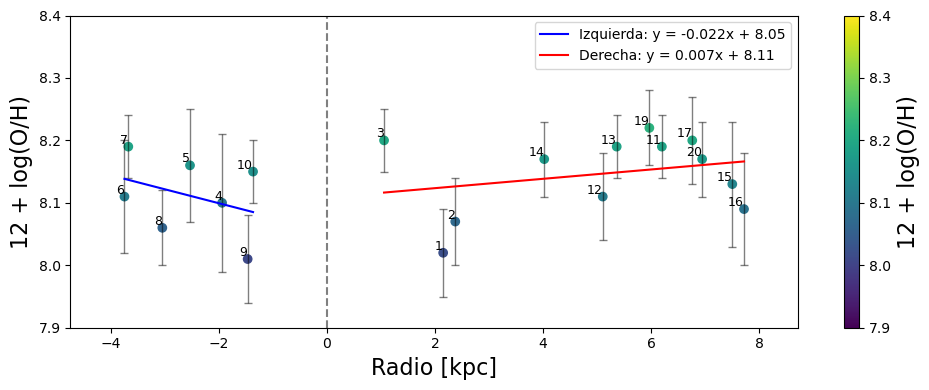

In [7]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

# Cargar los datos
df_abund = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')
df = pd.merge(df_abund, df_signed, on='ID')

# Separar datos
df_left = df[df['signed_distance_kpc'] < 0]
df_right = df[df['signed_distance_kpc'] >= 0]

# Función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

model = Model(linear)

# Ajuste lado izquierdo
result_left = model.fit(df_left['12_LOG_OH_N2'], x=df_left['signed_distance_kpc'],
                        yerr=df_left['12_LOG_OH_N2_ERR'], slope=-0.1, intercept=8.2)

# Ajuste lado derecho
result_right = model.fit(df_right['12_LOG_OH_N2'], x=df_right['signed_distance_kpc'],
                         yerr=df_right['12_LOG_OH_N2_ERR'], slope=-0.1, intercept=8.2)

# Imprimir reportes detallados
print("=== AJUSTE LADO IZQUIERDO (x < 0) ===")
print(result_left.fit_report())

print("\n=== AJUSTE LADO DERECHO (x >= 0) ===")
print(result_right.fit_report())

# Graficar
plt.figure(figsize=(10, 4))
plt.errorbar(df['signed_distance_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'],
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

sc = plt.scatter(df['signed_distance_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'],
                 cmap='viridis', vmin=7.9, vmax=8.4)
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)', fontsize=16)

# Ajustes
x_left_sorted = np.sort(df_left['signed_distance_kpc'])
plt.plot(x_left_sorted, result_left.eval(x=x_left_sorted), color='blue',
         label=f"Izquierda: y = {result_left.params['slope'].value:.3f}x + {result_left.params['intercept'].value:.2f}")

x_right_sorted = np.sort(df_right['signed_distance_kpc'])
plt.plot(x_right_sorted, result_right.eval(x=x_right_sorted), color='red',
         label=f"Derecha: y = {result_right.params['slope'].value:.3f}x + {result_right.params['intercept'].value:.2f}")

# IDs
for i, row in df.iterrows():
    plt.text(row['signed_distance_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])),
             fontsize=9, ha='right', va='bottom')

plt.axvline(x=0, linestyle='--', color='gray')
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(min(df['signed_distance_kpc']) - 1, max(df['signed_distance_kpc']) + 1)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


<>:53: SyntaxWarning: invalid escape sequence '\c'
<>:53: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/564842614.py:53: SyntaxWarning: invalid escape sequence '\c'
  label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$ = {chi_square:.2f}")
/Users/belen/opt/anaconda3/lib/python3.12/site-packages/lmfit/model.py:1123: UserWarning: The keyword argument yerr does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +


===== RESULTADOS DEL AJUSTE =====
Pendiente (slope)       = 0.01149 ± 0.00630
Intercepto (intercept)  = 8.08150 ± 0.03166
Número de puntos (ndata)= 19
Grados de libertad (dof)= 17
Chi-cuadrado (χ²)       = 0.060
Chi-cuadrado reducido   = 0.004

--- Reporte completo de lmfit ---
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 19
    # variables        = 2
    chi-square         = 0.05957370
    reduced chi-square = 0.00350434
    Akaike info crit   = -105.534620
    Bayesian info crit = -103.645742
    R-squared          = 0.16378519
[[Variables]]
    slope:      0.01148929 +/- 0.00629637 (54.80%) (init = 0.01)
    intercept:  8.08150469 +/- 0.03165659 (0.39%) (init = 8.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9033


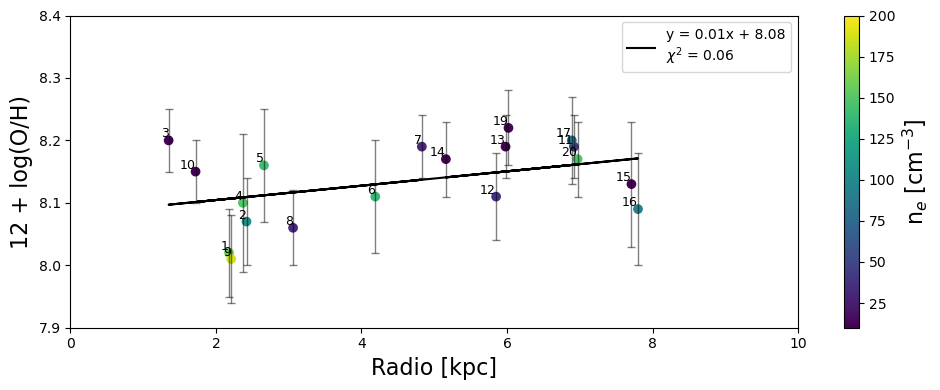

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], yerr=df['12_LOG_OH_N2_ERR'], slope=0.01, intercept=8.1)

# Extraer parámetros importantes
slope = result.params['slope'].value
slope_err = result.params['slope'].stderr
intercept = result.params['intercept'].value
intercept_err = result.params['intercept'].stderr
chi_square = result.chisqr
red_chi_square = result.redchi
dof = result.nfree
ndata = result.ndata

# Mostrar los resultados estadísticos
print("===== RESULTADOS DEL AJUSTE =====")
print(f"Pendiente (slope)       = {slope:.5f} ± {slope_err:.5f}")
print(f"Intercepto (intercept)  = {intercept:.5f} ± {intercept_err:.5f}")
print(f"Número de puntos (ndata)= {ndata}")
print(f"Grados de libertad (dof)= {dof}")
print(f"Chi-cuadrado (χ²)       = {chi_square:.3f}")
print(f"Chi-cuadrado reducido   = {red_chi_square:.3f}")
print("\n--- Reporte completo de lmfit ---")
print(result.fit_report())

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'],
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['n_e'], cmap='viridis', vmin=10, vmax=200)
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]', fontsize=16)

# Graficar línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black',
         label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$ = {chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas del gráfico
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


/Users/belen/opt/anaconda3/lib/python3.12/site-packages/lmfit/model.py:1123: UserWarning: The keyword argument yerr does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +


===== RESULTADOS DEL AJUSTE =====
Pendiente (slope)       = 0.01149 ± 0.00630
Intercepto (intercept)  = 8.08150 ± 0.03166
Número de puntos (ndata)= 19
Grados de libertad (dof)= 17
Chi-cuadrado (χ²)       = 0.060
Chi-cuadrado reducido   = 0.004

--- Reporte completo de lmfit ---
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 19
    # variables        = 2
    chi-square         = 0.05957370
    reduced chi-square = 0.00350434
    Akaike info crit   = -105.534620
    Bayesian info crit = -103.645742
    R-squared          = 0.16378519
[[Variables]]
    slope:      0.01148929 +/- 0.00629637 (54.80%) (init = 0.01)
    intercept:  8.08150469 +/- 0.03165659 (0.39%) (init = 8.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9033


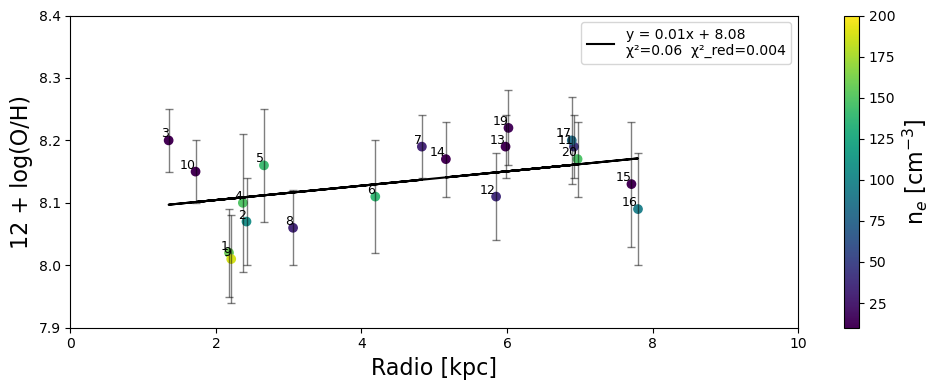

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit
model = Model(linear)

# Realizar el ajuste, PASANDO yerr para que χ² se calcule como sum((residual/σ_i)**2)
result = model.fit(
    df['12_LOG_OH_N2'],
    x=df['r_kpc'],
    yerr=df['12_LOG_OH_N2_ERR'],
    slope=0.01,
    intercept=8.1
)

# Extraer parámetros y estadísticos
slope = result.params['slope'].value
slope_err = result.params['slope'].stderr
intercept = result.params['intercept'].value
intercept_err = result.params['intercept'].stderr

chi_square = result.chisqr       # χ² bruto
red_chi_square = result.redchi   # χ² reducido
ndata = result.ndata             # número de datos
dof = result.nfree               # grados de libertad = ndata - n_params

# Imprimir en consola los resultados
print("===== RESULTADOS DEL AJUSTE =====")
print(f"Pendiente (slope)       = {slope:.5f} ± {slope_err:.5f}")
print(f"Intercepto (intercept)  = {intercept:.5f} ± {intercept_err:.5f}")
print(f"Número de puntos (ndata)= {ndata}")
print(f"Grados de libertad (dof)= {dof}")
print(f"Chi-cuadrado (χ²)       = {chi_square:.3f}")
print(f"Chi-cuadrado reducido   = {red_chi_square:.3f}")
print("\n--- Reporte completo de lmfit ---")
print(result.fit_report())

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(
    df['r_kpc'],
    df['12_LOG_OH_N2'],
    yerr=df['12_LOG_OH_N2_ERR'],
    fmt='none',
    ecolor='black',
    capsize=3,
    alpha=0.5,
    elinewidth=1
)

# Scatter plot con color bar
sc = plt.scatter(
    df['r_kpc'],
    df['12_LOG_OH_N2'],
    c=df['n_e'],
    cmap='viridis',
    vmin=10,
    vmax=200
)
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]', fontsize=16)

# Graficar línea de regresión ajustada
plt.plot(
    df['r_kpc'],
    result.best_fit,
    color='black',
    label=f"y = {slope:.2f}x + {intercept:.2f}\nχ²={chi_square:.2f}  χ²_red={red_chi_square:.3f}"
)

# Añadir etiquetas de los puntos con ID
for _, row in df.iterrows():
    plt.text(
        row['r_kpc'],
        row['12_LOG_OH_N2'],
        str(int(row['ID'])),
        fontsize=9,
        ha='right',
        va='bottom'
    )

# Etiquetas del gráfico
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


DE AHORA EN ADELANTE, GRADIENTES CORRECTOS CON POLYFIT Y CHICUADRADO MANUAL , Y PLOTEANDO CHI CUADRADO REDUCIDO.

<>:56: SyntaxWarning: invalid escape sequence '\c'
<>:56: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/859497592.py:56: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x, y_pred, color='red', label=f"y = {m:.2f}x + {b:.2f}\n$\chi^2$={chi_squared:.2f}")


Pendiente: 0.0094
Intersección: 8.1178
Chi-cuadrado: 15.32
Chi-cuadrado reducido: 0.90
Grados de libertad: 17
p-valor del ajuste: 0.572


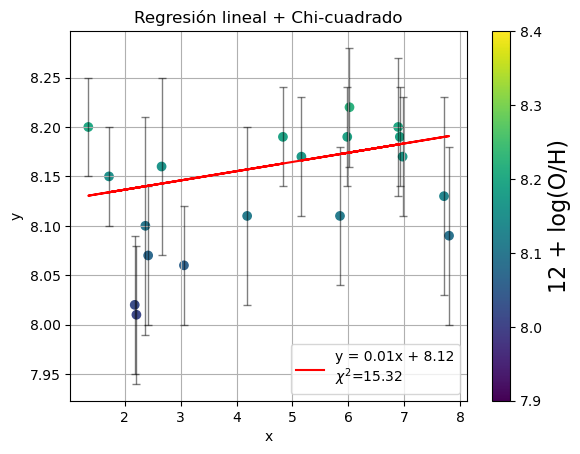

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Leer los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')

# Suponiendo que tus columnas relevantes son:
# 'x': variable independiente (ej. masa)
# 'y': variable dependiente (ej. gradiente)
# 'sigma_y': incertidumbre en y

x = df['r_kpc'].values
y = df['12_LOG_OH_N2'].values
sigma_y = df['12_LOG_OH_N2_ERR'].values  # si no tienes esta columna, podemos asumir sigma_y = 1

# Ajuste lineal ponderado con errores
weights = 1 / sigma_y**2
fit = np.polyfit(x, y, deg=1, w=weights)
m, b = fit

# Predicciones del modelo
y_pred = m * x + b

# Chi-cuadrado
chi_squared = np.sum(((y - y_pred)**2 / sigma_y**2))
dof = len(x) - 2  # 2 parámetros: pendiente e intercepto
reduced_chi_squared = chi_squared / dof


# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# p-valor para la calidad del ajuste
p_value = 1 - chi2.cdf(chi_squared, dof)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)


# Mostrar resultados
print(f"Pendiente: {m:.4f}")
print(f"Intersección: {b:.4f}")
print(f"Chi-cuadrado: {chi_squared:.2f}")
print(f"Chi-cuadrado reducido: {reduced_chi_squared:.2f}")
print(f"Grados de libertad: {dof}")
print(f"p-valor del ajuste: {p_value:.3f}")

# Graficar
#plt.errorbar(x, y, yerr=sigma_y, fmt='o', label='Datos')
plt.plot(x, y_pred, color='red', label=f"y = {m:.2f}x + {b:.2f}\n$\chi^2$={chi_squared:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresión lineal + Chi-cuadrado")
plt.grid(True)
plt.show()

<>:58: SyntaxWarning: invalid escape sequence '\c'
<>:58: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/42463104.py:58: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x, y_pred, color='red', label=f"y = {m:.2f}x + {b:.2f}\n$\chi^2$={chi_squared:.2f}")


Pendiente: 0.0094
Intersección: 8.1178
Chi-cuadrado: 15.32
Chi-cuadrado reducido: 0.90
Grados de libertad: 17
p-valor del ajuste: 0.572


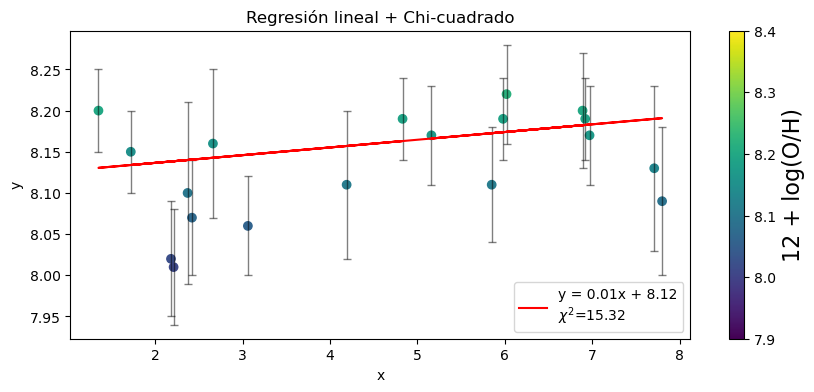

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Leer los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')

# Suponiendo que tus columnas relevantes son:
# 'x': variable independiente (ej. masa)
# 'y': variable dependiente (ej. gradiente)
# 'sigma_y': incertidumbre en y

x = df['r_kpc'].values
y = df['12_LOG_OH_N2'].values
sigma_y = df['12_LOG_OH_N2_ERR'].values  # si no tienes esta columna, podemos asumir sigma_y = 1

# Ajuste lineal ponderado con errores
weights = 1 / sigma_y**2
fit = np.polyfit(x, y, deg=1, w=weights)
m, b = fit

# Predicciones del modelo
y_pred = m * x + b

# Chi-cuadrado
chi_squared = np.sum(((y - y_pred)**2 / sigma_y**2))
dof = len(x) - 2  # 2 parámetros: pendiente e intercepto
reduced_chi_squared = chi_squared / dof


# Configurar la gráfica
plt.figure(figsize=(10, 4))
# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# p-valor para la calidad del ajuste
p_value = 1 - chi2.cdf(chi_squared, dof)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)


# Mostrar resultados
print(f"Pendiente: {m:.4f}")
print(f"Intersección: {b:.4f}")
print(f"Chi-cuadrado: {chi_squared:.2f}")
print(f"Chi-cuadrado reducido: {reduced_chi_squared:.2f}")
print(f"Grados de libertad: {dof}")
print(f"p-valor del ajuste: {p_value:.3f}")

# Graficar
#plt.errorbar(x, y, yerr=sigma_y, fmt='o', label='Datos')
plt.plot(x, y_pred, color='black', label=f"y = {m:.2f}x + {b:.2f}\n$\chi^2$={chi_squared:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresión lineal + Chi-cuadrado")
#plt.grid(True)
plt.show()

Pendiente:           0.0094
Intercepto:          8.1178
Chi-cuadrado:        15.32
Chi-cuadrado red.:   0.90
Grados de libertad:  17
p-valor del ajuste:  0.572


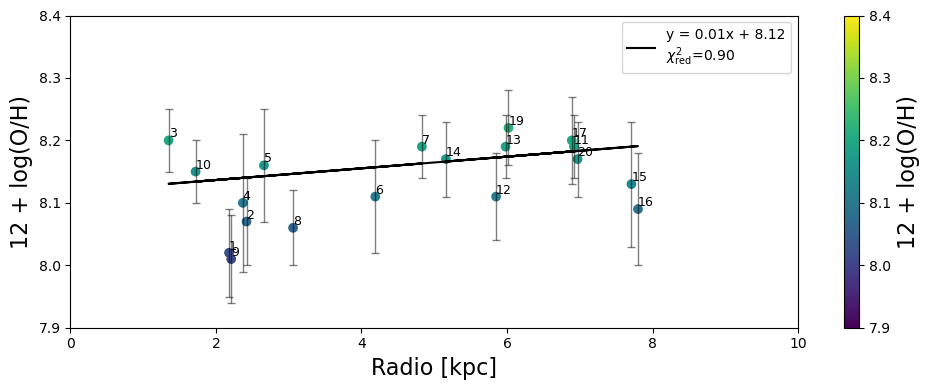

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Leer los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')

# Variables
x = df['r_kpc'].values
y = df['12_LOG_OH_N2'].values
sigma_y = df['12_LOG_OH_N2_ERR'].values  # incertidumbre en y

# Ajuste lineal ponderado
weights = 1 / sigma_y**2
m, b = np.polyfit(x, y, deg=1, w=weights)

# Predicción y estadísticas
y_pred = m * x + b
chi_squared = np.sum((y - y_pred)**2 / sigma_y**2)
dof = len(x) - 2  # n_params = 2 (pendiente, intercepto)
reduced_chi_squared = chi_squared / dof
p_value = 1 - chi2.cdf(chi_squared, dof)

# Imprimir resultados
print(f"Pendiente:           {m:.4f}")
print(f"Intercepto:          {b:.4f}")
print(f"Chi-cuadrado:        {chi_squared:.2f}")
print(f"Chi-cuadrado red.:   {reduced_chi_squared:.2f}")
print(f"Grados de libertad:  {dof}")
print(f"p-valor del ajuste:  {p_value:.3f}")

# Graficar
plt.figure(figsize=(10, 4))

# Barras de error
plt.errorbar(
    x, y, yerr=sigma_y,
    fmt='none', ecolor='black',
    capsize=3, alpha=0.5, elinewidth=1
)

# Scatter de puntos
sc = plt.scatter(
    x, y,
    c=y, cmap='viridis',
    vmin=7.9, vmax=8.4
)
#cbar = plt.colorbar(sc)
#cbar.set_label('12 + log(O/H)', fontsize=16)

# Etiquetar cada punto con su ID
for xi, yi, idi in zip(x, y, df['ID']):
    plt.text(
        xi, yi, str(int(idi)),
        fontsize=9, ha='left', va='bottom'
    )

# Línea de regresión
plt.plot(
    x, y_pred,
    color='black',
    label=f"y = {m:.2f}x + {b:.2f}\n" +
          r"$\chi^2_{\rm red}$" + f"={reduced_chi_squared:.2f}"
)

plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


Pendiente:           0.0094
Intercepto:          8.1178
Chi-cuadrado:        15.32
Chi-cuadrado red.:   0.90
Grados de libertad:  17
p-valor del ajuste:  0.572


/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1648/74504750.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sc = plt.scatter(


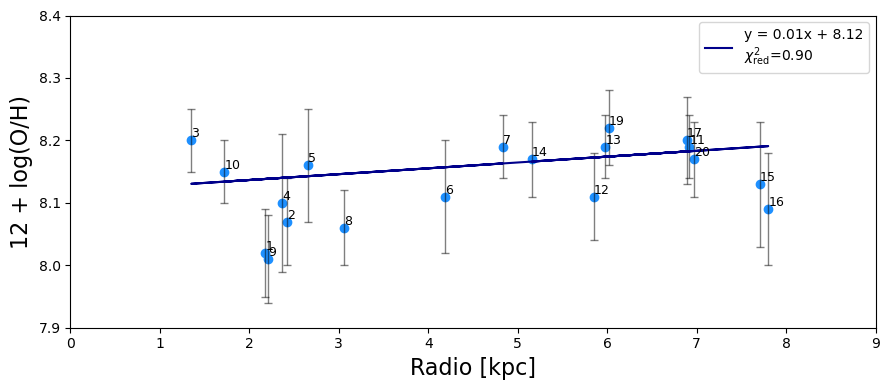

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Leer los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')

# Variables
x = df['r_kpc'].values
y = df['12_LOG_OH_N2'].values
sigma_y = df['12_LOG_OH_N2_ERR'].values  # incertidumbre en y

# Ajuste lineal ponderado
weights = 1 / sigma_y**2
m, b = np.polyfit(x, y, deg=1, w=weights)

# Predicción y estadísticas
y_pred = m * x + b
chi_squared = np.sum((y - y_pred)**2 / sigma_y**2)
dof = len(x) - 2  # n_params = 2 (pendiente, intercepto)
reduced_chi_squared = chi_squared / dof
p_value = 1 - chi2.cdf(chi_squared, dof)

# Imprimir resultados
print(f"Pendiente:           {m:.4f}")
print(f"Intercepto:          {b:.4f}")
print(f"Chi-cuadrado:        {chi_squared:.2f}")
print(f"Chi-cuadrado red.:   {reduced_chi_squared:.2f}")
print(f"Grados de libertad:  {dof}")
print(f"p-valor del ajuste:  {p_value:.3f}")

# Graficar
plt.figure(figsize=(9, 4))

# Barras de error
plt.errorbar(
    x, y, yerr=sigma_y,
    fmt='none', ecolor='black',
    capsize=3, alpha=0.5, elinewidth=1
)

# Scatter de puntos
sc = plt.scatter(
    x, y,
    color='dodgerblue',
    vmin=7.9, vmax=8.4
)
#cbar = plt.colorbar(sc)
#cbar.set_label('12 + log(O/H)', fontsize=16)

# Etiquetar cada punto con su ID
for xi, yi, idi in zip(x, y, df['ID']):
    plt.text(
        xi, yi, str(int(idi)),
        fontsize=9, ha='left', va='bottom'
    )

# Línea de regresión
plt.plot(
    x, y_pred,
    color='darkblue',
    label=f"y = {m:.2f}x + {b:.2f}\n" +
          r"$\chi^2_{\rm red}$" + f"={reduced_chi_squared:.2f}"
)

plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(0, 9)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


Pendiente:           0.0094
Intercepto:          8.1178
Chi-cuadrado:        15.32
Chi-cuadrado red.:   0.90
Grados de libertad:  17
p-valor del ajuste:  0.572


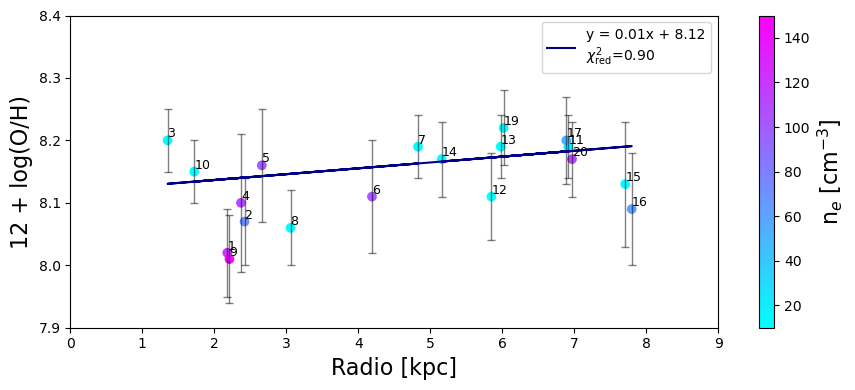

0     120.68
1      70.99
2      10.00
3     110.29
4     100.13
5     100.13
6       9.99
7       9.99
8     142.22
9      10.00
10     18.17
11      9.99
12     10.00
13     10.00
14     10.00
15     61.71
16     52.63
17     10.00
18    110.29
Name: n_e, dtype: float64

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Leer los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Variables
x = df['r_kpc'].values
y = df['12_LOG_OH_N2'].values
sigma_y = df['12_LOG_OH_N2_ERR'].values  # incertidumbre en y

# Ajuste lineal ponderado
weights = 1 / sigma_y**2
m, b = np.polyfit(x, y, deg=1, w=weights)

# Predicción y estadísticas
y_pred = m * x + b
chi_squared = np.sum((y - y_pred)**2 / sigma_y**2)
dof = len(x) - 2  # n_params = 2 (pendiente, intercepto)
reduced_chi_squared = chi_squared / dof
p_value = 1 - chi2.cdf(chi_squared, dof)

# Imprimir resultados
print(f"Pendiente:           {m:.4f}")
print(f"Intercepto:          {b:.4f}")
print(f"Chi-cuadrado:        {chi_squared:.2f}")
print(f"Chi-cuadrado red.:   {reduced_chi_squared:.2f}")
print(f"Grados de libertad:  {dof}")
print(f"p-valor del ajuste:  {p_value:.3f}")

# Graficar
plt.figure(figsize=(9, 4))

# Barras de error
plt.errorbar(
    x, y, yerr=sigma_y,
    fmt='none', ecolor='black',
    capsize=3, alpha=0.5, elinewidth=1
)

# Scatter de puntos
sc = plt.scatter(
    x, y,
    c=df['n_e'], cmap='cool',
    vmin=10, vmax=150
)
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]', fontsize=16)


# Etiquetar cada punto con su ID
for xi, yi, idi in zip(x, y, df['ID']):
    plt.text(
        xi, yi, str(int(idi)),
        fontsize=9, ha='left', va='bottom'
    )

# Línea de regresión
plt.plot(
    x, y_pred,
    color='darkblue',
    label=f"y = {m:.2f}x + {b:.2f}\n" +
          r"$\chi^2_{\rm red}$" + f"={reduced_chi_squared:.2f}"
)

plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(0, 9)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()
df['n_e']


Pendiente:           0.0094
Intercepto:          8.1178
Chi-cuadrado:        15.32
Chi-cuadrado red.:   0.90
Grados de libertad:  17
p-valor del ajuste:  0.572


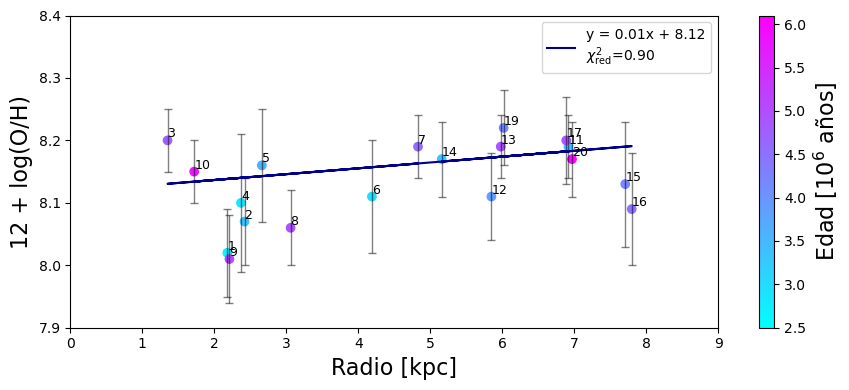

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Leer los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Variables
x = df['r_kpc'].values
y = df['12_LOG_OH_N2'].values
sigma_y = df['12_LOG_OH_N2_ERR'].values  # incertidumbre en y

# Ajuste lineal ponderado
weights = 1 / sigma_y**2
m, b = np.polyfit(x, y, deg=1, w=weights)

# Predicción y estadísticas
y_pred = m * x + b
chi_squared = np.sum((y - y_pred)**2 / sigma_y**2)
dof = len(x) - 2  # n_params = 2 (pendiente, intercepto)
reduced_chi_squared = chi_squared / dof
p_value = 1 - chi2.cdf(chi_squared, dof)

# Imprimir resultados
print(f"Pendiente:           {m:.4f}")
print(f"Intercepto:          {b:.4f}")
print(f"Chi-cuadrado:        {chi_squared:.2f}")
print(f"Chi-cuadrado red.:   {reduced_chi_squared:.2f}")
print(f"Grados de libertad:  {dof}")
print(f"p-valor del ajuste:  {p_value:.3f}")

# Graficar
plt.figure(figsize=(9, 4))

# Barras de error
plt.errorbar(
    x, y, yerr=sigma_y,
    fmt='none', ecolor='black',
    capsize=3, alpha=0.5, elinewidth=1
)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['age'], cmap='cool', vmin=2.5, vmax=6.1)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Edad [10$^6$ años]',fontsize=16)

# Etiquetar cada punto con su ID
for xi, yi, idi in zip(x, y, df['ID']):
    plt.text(
        xi, yi, str(int(idi)),
        fontsize=9, ha='left', va='bottom'
    )

# Línea de regresión
plt.plot(
    x, y_pred,
    color='darkblue',
    label=f"y = {m:.2f}x + {b:.2f}\n" +
          r"$\chi^2_{\rm red}$" + f"={reduced_chi_squared:.2f}"
)

plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(0, 9)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1648/2724243918.py:48: SyntaxWarning: invalid escape sequence '\o'
  cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)


Pendiente:           0.0094
Intercepto:          8.1178
Chi-cuadrado:        15.32
Chi-cuadrado red.:   0.90
Grados de libertad:  17
p-valor del ajuste:  0.572


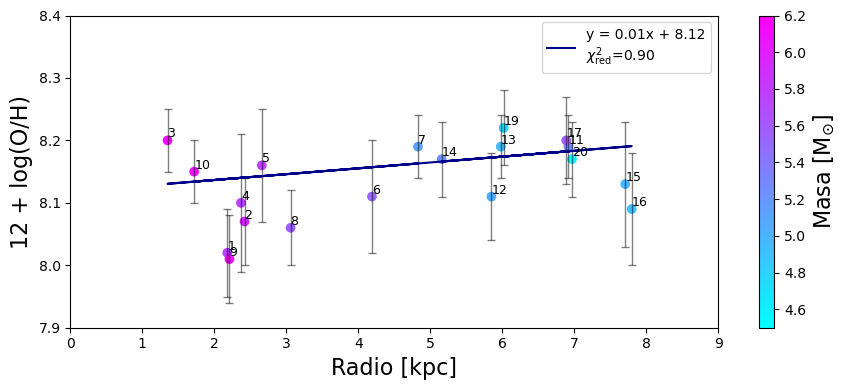

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Leer los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Variables
x = df['r_kpc'].values
y = df['12_LOG_OH_N2'].values
sigma_y = df['12_LOG_OH_N2_ERR'].values  # incertidumbre en y

# Ajuste lineal ponderado
weights = 1 / sigma_y**2
m, b = np.polyfit(x, y, deg=1, w=weights)

# Predicción y estadísticas
y_pred = m * x + b
chi_squared = np.sum((y - y_pred)**2 / sigma_y**2)
dof = len(x) - 2  # n_params = 2 (pendiente, intercepto)
reduced_chi_squared = chi_squared / dof
p_value = 1 - chi2.cdf(chi_squared, dof)

# Imprimir resultados
print(f"Pendiente:           {m:.4f}")
print(f"Intercepto:          {b:.4f}")
print(f"Chi-cuadrado:        {chi_squared:.2f}")
print(f"Chi-cuadrado red.:   {reduced_chi_squared:.2f}")
print(f"Grados de libertad:  {dof}")
print(f"p-valor del ajuste:  {p_value:.3f}")

# Graficar
plt.figure(figsize=(9, 4))

# Barras de error
plt.errorbar(
    x, y, yerr=sigma_y,
    fmt='none', ecolor='black',
    capsize=3, alpha=0.5, elinewidth=1
)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['mass'], cmap='cool', vmin=4.5, vmax=6.2)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)

# Etiquetar cada punto con su ID
for xi, yi, idi in zip(x, y, df['ID']):
    plt.text(
        xi, yi, str(int(idi)),
        fontsize=9, ha='left', va='bottom'
    )

# Línea de regresión
plt.plot(
    x, y_pred,
    color='darkblue',
    label=f"y = {m:.2f}x + {b:.2f}\n" +
          r"$\chi^2_{\rm red}$" + f"={reduced_chi_squared:.2f}"
)

plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(0, 9)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


=== LADO IZQUIERDO (x < 0) ===
  Pendiente        = -0.0184
  Intercepto       = 8.0882
  Chi²             = 5.63
  Chi² reducido    = 1.126 (dof=5)
  p-valor          = 0.344

=== LADO DERECHO (x ≥ 0) ===
  Pendiente        = 0.0042
  Intercepto       = 8.1524
  Chi²             = 9.56
  Chi² reducido    = 0.956 (dof=10)
  p-valor          = 0.480



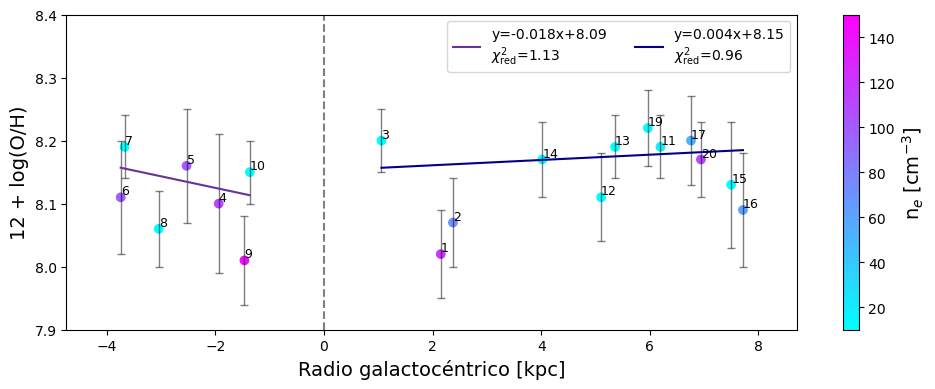

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 1) Cargar y unir los datos galactocéntricos
df_abund = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')
df        = pd.merge(df_abund, df_signed, on='ID')

# 2) Separar en izquierda (x<0) y derecha (x>=0)
df_left  = df[df['signed_distance_kpc'] <  0].copy()
df_right = df[df['signed_distance_kpc'] >= 0].copy()

# 3) Función de ajuste: polyfit ponderado
def weighted_fit(x, y, σ):
    w = 1/σ**2
    m, b = np.polyfit(x, y, deg=1, w=w)
    y_pred = m*x + b
    χ2     = np.sum((y - y_pred)**2 / σ**2)
    dof    = len(x) - 2
    χ2_red = χ2 / dof
    pval   = 1 - chi2.cdf(χ2, dof)
    return m, b, χ2, χ2_red, dof, pval, y_pred

# 4) Ajustar cada lado
σ_left = df_left['12_LOG_OH_N2_ERR'].values
σ_right= df_right['12_LOG_OH_N2_ERR'].values

mL, bL, χ2L, χ2L_red, dofL, pL, yL_pred = weighted_fit(
    df_left['signed_distance_kpc'].values,
    df_left['12_LOG_OH_N2'].values,
    σ_left
)

mR, bR, χ2R, χ2R_red, dofR, pR, yR_pred = weighted_fit(
    df_right['signed_distance_kpc'].values,
    df_right['12_LOG_OH_N2'].values,
    σ_right
)

# 5) Imprimir resultados
print("=== LADO IZQUIERDO (x < 0) ===")
print(f"  Pendiente        = {mL:.4f}")
print(f"  Intercepto       = {bL:.4f}")
print(f"  Chi²             = {χ2L:.2f}")
print(f"  Chi² reducido    = {χ2L_red:.3f} (dof={dofL})")
print(f"  p-valor          = {pL:.3f}\n")

print("=== LADO DERECHO (x ≥ 0) ===")
print(f"  Pendiente        = {mR:.4f}")
print(f"  Intercepto       = {bR:.4f}")
print(f"  Chi²             = {χ2R:.2f}")
print(f"  Chi² reducido    = {χ2R_red:.3f} (dof={dofR})")
print(f"  p-valor          = {pR:.3f}\n")

# 6) Graficar
plt.figure(figsize=(10,4))

# 6a) barras de error
plt.errorbar(
    df['signed_distance_kpc'],
    df['12_LOG_OH_N2'],
    yerr=df['12_LOG_OH_N2_ERR'],
    fmt='none', ecolor='black',
    capsize=3, alpha=0.5, elinewidth=1
)

# 6b) scatter de puntos, coloreados por abundancia
sc = plt.scatter(
    df['signed_distance_kpc'],
    df['12_LOG_OH_N2'],
    c=df['n_e'],
    cmap='cool', vmin=10, vmax=150
)
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]', fontsize=14)

# 6c) etiquetas con ID
for x_i, y_i, id_i in zip(df['signed_distance_kpc'], df['12_LOG_OH_N2'], df['ID']):
    plt.text(x_i, y_i, str(int(id_i)), fontsize=9, ha='left', va='bottom')

# 6d) líneas de regresión
# izquierda
xL_sorted = np.sort(df_left['signed_distance_kpc'].values)
yL_sorted = mL * xL_sorted + bL
plt.plot(
    xL_sorted, yL_sorted,
    color='rebeccapurple',
    label=(
        f"y={mL:.3f}x+{bL:.2f}\n"
        r"$\chi^2_{\rm red}$" + f"={χ2L_red:.2f}"
    )
)

# derecha
xR_sorted = np.sort(df_right['signed_distance_kpc'].values)
yR_sorted = mR * xR_sorted + bR
plt.plot(
    xR_sorted, yR_sorted,
    color='darkblue',
    label=(
        f"y={mR:.3f}x+{bR:.2f}\n"
        r"$\chi^2_{\rm red}$" + f"={χ2R_red:.2f}"
    )
)

# línea vertical en x=0
plt.axvline(0, linestyle='--', color='gray')

# 7) Estética final
plt.xlabel('Radio galactocéntrico [kpc]', fontsize=14)
plt.ylabel('12 + log(O/H)', fontsize=14)
plt.xlim(df['signed_distance_kpc'].min() - 1, df['signed_distance_kpc'].max() + 1)
plt.ylim(7.9, 8.4)
plt.legend(fontsize=10, ncol=2)
plt.tight_layout()
plt.show()


=== LADO IZQUIERDO (x < 0) ===
Pendiente        = -0.0184 ± 0.0267
Intercepto       = 8.0882 ± 0.0728
Chi²             = 5.63
Chi² reducido    = 1.126 (dof=5)
p‑valor          = 0.344

=== LADO DERECHO (x ≥ 0) ===
Pendiente        = 0.0042 ± 0.0084
Intercepto       = 8.1524 ± 0.0441
Chi²             = 9.56
Chi² reducido    = 0.956 (dof=10)
p‑valor          = 0.480



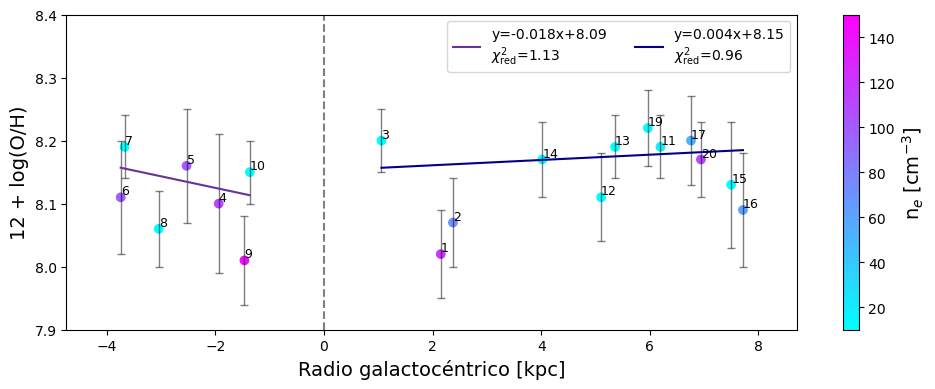

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 1) Cargar y unir los datos galactocéntricos
df_abund  = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')
df        = pd.merge(df_abund, df_signed, on='ID')

# 2) Separar en izquierda (x<0) y derecha (x>=0)
df_left  = df[df['signed_distance_kpc'] <  0].copy()
df_right = df[df['signed_distance_kpc'] >= 0].copy()

def fit_and_stats(x, y, σ):
    # Ajuste ponderado
    w       = 1/σ**2
    m, b   = np.polyfit(x, y, deg=1, w=w)
    # Error estándar de parámetros
    # cov = V*(∑w_i x_i^2)^(-1) etc. Podemos aproximar con np.polyfit cov='unscaled'
    # pero simplest: use np.sqrt(diag(cov)*χ²_red)
    # En polyfit no entrega cov por defecto, así que estimamos stderr manualmente:
    y_pred = m*x + b
    χ2     = np.sum((y - y_pred)**2 / σ**2)
    dof    = len(x) - 2
    χ2_red = χ2 / dof
    # aproximación simple de varianza de parámetros
    # var(m) ≃ χ2_red * (∑w_i)^(-1)
    var_b  = χ2_red * np.sum(x**2 * w) / (np.sum(w) * np.sum(w * x**2) - (np.sum(w * x))**2)
    var_m  = χ2_red * np.sum(w)      / (np.sum(w) * np.sum(w * x**2) - (np.sum(w * x))**2)
    m_err  = np.sqrt(var_m)
    b_err  = np.sqrt(var_b)
    pval   = 1 - chi2.cdf(χ2, dof)
    return m, m_err, b, b_err, χ2, χ2_red, dof, pval, y_pred

# 3) Ajustar cada mitad con el método manual
xL = df_left['signed_distance_kpc'].values
yL = df_left['12_LOG_OH_N2'].values
σL = df_left['12_LOG_OH_N2_ERR'].values

xR = df_right['signed_distance_kpc'].values
yR = df_right['12_LOG_OH_N2'].values
σR = df_right['12_LOG_OH_N2_ERR'].values

mL, mL_err, bL, bL_err, χ2L, χ2L_red, dofL, pL, yL_pred = fit_and_stats(xL, yL, σL)
mR, mR_err, bR, bR_err, χ2R, χ2R_red, dofR, pR, yR_pred = fit_and_stats(xR, yR, σR)

# 4) Mostrar resultados
print("=== LADO IZQUIERDO (x < 0) ===")
print(f"Pendiente        = {mL:.4f} ± {mL_err:.4f}")
print(f"Intercepto       = {bL:.4f} ± {bL_err:.4f}")
print(f"Chi²             = {χ2L:.2f}")
print(f"Chi² reducido    = {χ2L_red:.3f} (dof={dofL})")
print(f"p‑valor          = {pL:.3f}\n")

print("=== LADO DERECHO (x ≥ 0) ===")
print(f"Pendiente        = {mR:.4f} ± {mR_err:.4f}")
print(f"Intercepto       = {bR:.4f} ± {bR_err:.4f}")
print(f"Chi²             = {χ2R:.2f}")
print(f"Chi² reducido    = {χ2R_red:.3f} (dof={dofR})")
print(f"p‑valor          = {pR:.3f}\n")

# 5) Graficar
plt.figure(figsize=(10,4))

# Barras de error globales
plt.errorbar(
    df['signed_distance_kpc'], df['12_LOG_OH_N2'],
    yerr=df['12_LOG_OH_N2_ERR'],
    fmt='none', ecolor='black',
    capsize=3, alpha=0.5, elinewidth=1
)

# Scatter de puntos con ID
sc = plt.scatter(
    df['signed_distance_kpc'], df['12_LOG_OH_N2'],
    c=df['n_e'], cmap='cool', vmin=10, vmax=150
)
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]', fontsize=14)



for x_i, y_i, id_i in zip(df['signed_distance_kpc'], df['12_LOG_OH_N2'], df['ID']):
    plt.text(x_i, y_i, str(int(id_i)), fontsize=9, ha='left', va='bottom')

# Línea de ajuste izquierda
xL_sort = np.sort(xL)
yL_sort = mL * xL_sort + bL
plt.plot(
    xL_sort, yL_sort, color='rebeccapurple',
    label=(
        f"y={mL:.3f}x+{bL:.2f}\n"
        r"$\chi^2_{\rm red}$" + f"={χ2L_red:.2f}"
    )
)

# Línea de ajuste derecha
xR_sort = np.sort(xR)
yR_sort = mR * xR_sort + bR
plt.plot(
    xR_sort, yR_sort, color='darkblue',
    label=(
        f"y={mR:.3f}x+{bR:.2f}\n"
        r"$\chi^2_{\rm red}$" + f"={χ2R_red:.2f}"
    )
)

plt.axvline(0, linestyle='--', color='gray')
plt.xlabel('Radio galactocéntrico [kpc]', fontsize=14)
plt.ylabel('12 + log(O/H)', fontsize=14)
plt.xlim(df['signed_distance_kpc'].min() - 1, df['signed_distance_kpc'].max() + 1)
plt.ylim(7.9, 8.4)
# Leyenda horizontal con dos columnas
plt.legend(fontsize=10, ncol=2)
plt.tight_layout()
plt.show()


<>:80: SyntaxWarning: invalid escape sequence '\o'
<>:80: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1447/124015239.py:80: SyntaxWarning: invalid escape sequence '\o'
  cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)


=== LADO IZQUIERDO (x < 0) ===
Pendiente        = -0.0184 ± 0.0267
Intercepto       = 8.0882 ± 0.0728
Chi²             = 5.63
Chi² reducido    = 1.126 (dof=5)
p‑valor          = 0.344

=== LADO DERECHO (x ≥ 0) ===
Pendiente        = 0.0042 ± 0.0084
Intercepto       = 8.1524 ± 0.0441
Chi²             = 9.56
Chi² reducido    = 0.956 (dof=10)
p‑valor          = 0.480



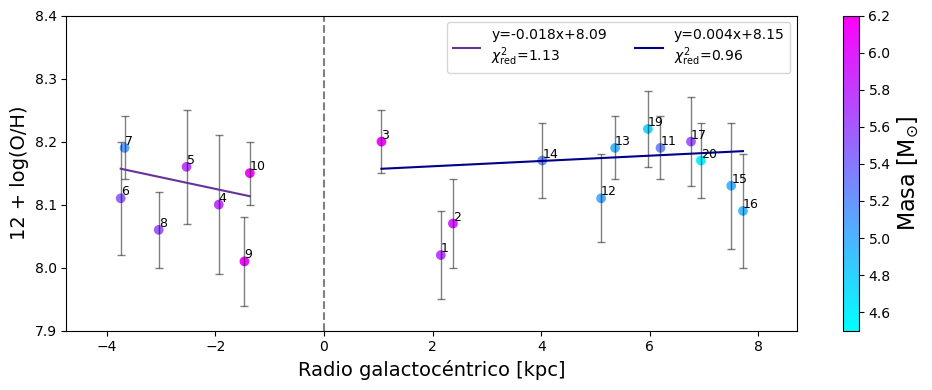

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 1) Cargar y unir los datos galactocéntricos
df_abund  = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')
df        = pd.merge(df_abund, df_signed, on='ID')

# 2) Separar en izquierda (x<0) y derecha (x>=0)
df_left  = df[df['signed_distance_kpc'] <  0].copy()
df_right = df[df['signed_distance_kpc'] >= 0].copy()

def fit_and_stats(x, y, σ):
    # Ajuste ponderado
    w       = 1/σ**2
    m, b   = np.polyfit(x, y, deg=1, w=w)
    # Error estándar de parámetros
    # cov = V*(∑w_i x_i^2)^(-1) etc. Podemos aproximar con np.polyfit cov='unscaled'
    # pero simplest: use np.sqrt(diag(cov)*χ²_red)
    # En polyfit no entrega cov por defecto, así que estimamos stderr manualmente:
    y_pred = m*x + b
    χ2     = np.sum((y - y_pred)**2 / σ**2)
    dof    = len(x) - 2
    χ2_red = χ2 / dof
    # aproximación simple de varianza de parámetros
    # var(m) ≃ χ2_red * (∑w_i)^(-1)
    var_b  = χ2_red * np.sum(x**2 * w) / (np.sum(w) * np.sum(w * x**2) - (np.sum(w * x))**2)
    var_m  = χ2_red * np.sum(w)      / (np.sum(w) * np.sum(w * x**2) - (np.sum(w * x))**2)
    m_err  = np.sqrt(var_m)
    b_err  = np.sqrt(var_b)
    pval   = 1 - chi2.cdf(χ2, dof)
    return m, m_err, b, b_err, χ2, χ2_red, dof, pval, y_pred

# 3) Ajustar cada mitad con el método manual
xL = df_left['signed_distance_kpc'].values
yL = df_left['12_LOG_OH_N2'].values
σL = df_left['12_LOG_OH_N2_ERR'].values

xR = df_right['signed_distance_kpc'].values
yR = df_right['12_LOG_OH_N2'].values
σR = df_right['12_LOG_OH_N2_ERR'].values

mL, mL_err, bL, bL_err, χ2L, χ2L_red, dofL, pL, yL_pred = fit_and_stats(xL, yL, σL)
mR, mR_err, bR, bR_err, χ2R, χ2R_red, dofR, pR, yR_pred = fit_and_stats(xR, yR, σR)

# 4) Mostrar resultados
print("=== LADO IZQUIERDO (x < 0) ===")
print(f"Pendiente        = {mL:.4f} ± {mL_err:.4f}")
print(f"Intercepto       = {bL:.4f} ± {bL_err:.4f}")
print(f"Chi²             = {χ2L:.2f}")
print(f"Chi² reducido    = {χ2L_red:.3f} (dof={dofL})")
print(f"p‑valor          = {pL:.3f}\n")

print("=== LADO DERECHO (x ≥ 0) ===")
print(f"Pendiente        = {mR:.4f} ± {mR_err:.4f}")
print(f"Intercepto       = {bR:.4f} ± {bR_err:.4f}")
print(f"Chi²             = {χ2R:.2f}")
print(f"Chi² reducido    = {χ2R_red:.3f} (dof={dofR})")
print(f"p‑valor          = {pR:.3f}\n")

# 5) Graficar
plt.figure(figsize=(10,4))

# Barras de error globales
plt.errorbar(
    df['signed_distance_kpc'], df['12_LOG_OH_N2'],
    yerr=df['12_LOG_OH_N2_ERR'],
    fmt='none', ecolor='black',
    capsize=3, alpha=0.5, elinewidth=1
)


# Scatter plot con color bar
sc = plt.scatter(df['signed_distance_kpc'], df['12_LOG_OH_N2'], c=df['mass'], cmap='cool', vmin=4.5, vmax=6.2)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)



for x_i, y_i, id_i in zip(df['signed_distance_kpc'], df['12_LOG_OH_N2'], df['ID']):
    plt.text(x_i, y_i, str(int(id_i)), fontsize=9, ha='left', va='bottom')

# Línea de ajuste izquierda
xL_sort = np.sort(xL)
yL_sort = mL * xL_sort + bL
plt.plot(
    xL_sort, yL_sort, color='rebeccapurple',
    label=(
        f"y={mL:.3f}x+{bL:.2f}\n"
        r"$\chi^2_{\rm red}$" + f"={χ2L_red:.2f}"
    )
)

# Línea de ajuste derecha
xR_sort = np.sort(xR)
yR_sort = mR * xR_sort + bR
plt.plot(
    xR_sort, yR_sort, color='darkblue',
    label=(
        f"y={mR:.3f}x+{bR:.2f}\n"
        r"$\chi^2_{\rm red}$" + f"={χ2R_red:.2f}"
    )
)

plt.axvline(0, linestyle='--', color='gray')
plt.xlabel('Radio galactocéntrico [kpc]', fontsize=14)
plt.ylabel('12 + log(O/H)', fontsize=14)
plt.xlim(df['signed_distance_kpc'].min() - 1, df['signed_distance_kpc'].max() + 1)
plt.ylim(7.9, 8.4)
# Leyenda horizontal con dos columnas
plt.legend(fontsize=10, ncol=2)
plt.tight_layout()
plt.show()


=== LADO IZQUIERDO (x < 0) ===
Pendiente        = -0.0184 ± 0.0267
Intercepto       = 8.0882 ± 0.0728
Chi²             = 5.63
Chi² reducido    = 1.126 (dof=5)
p‑valor          = 0.344

=== LADO DERECHO (x ≥ 0) ===
Pendiente        = 0.0042 ± 0.0084
Intercepto       = 8.1524 ± 0.0441
Chi²             = 9.56
Chi² reducido    = 0.956 (dof=10)
p‑valor          = 0.480



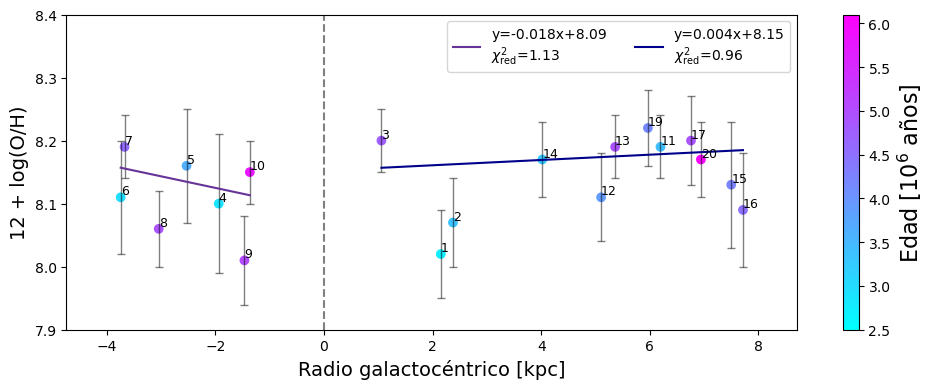

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 1) Cargar y unir los datos galactocéntricos
df_abund  = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')
df        = pd.merge(df_abund, df_signed, on='ID')

# 2) Separar en izquierda (x<0) y derecha (x>=0)
df_left  = df[df['signed_distance_kpc'] <  0].copy()
df_right = df[df['signed_distance_kpc'] >= 0].copy()

def fit_and_stats(x, y, σ):
    # Ajuste ponderado
    w       = 1/σ**2
    m, b   = np.polyfit(x, y, deg=1, w=w)
    # Error estándar de parámetros
    # cov = V*(∑w_i x_i^2)^(-1) etc. Podemos aproximar con np.polyfit cov='unscaled'
    # pero simplest: use np.sqrt(diag(cov)*χ²_red)
    # En polyfit no entrega cov por defecto, así que estimamos stderr manualmente:
    y_pred = m*x + b
    χ2     = np.sum((y - y_pred)**2 / σ**2)
    dof    = len(x) - 2
    χ2_red = χ2 / dof
    # aproximación simple de varianza de parámetros
    # var(m) ≃ χ2_red * (∑w_i)^(-1)
    var_b  = χ2_red * np.sum(x**2 * w) / (np.sum(w) * np.sum(w * x**2) - (np.sum(w * x))**2)
    var_m  = χ2_red * np.sum(w)      / (np.sum(w) * np.sum(w * x**2) - (np.sum(w * x))**2)
    m_err  = np.sqrt(var_m)
    b_err  = np.sqrt(var_b)
    pval   = 1 - chi2.cdf(χ2, dof)
    return m, m_err, b, b_err, χ2, χ2_red, dof, pval, y_pred

# 3) Ajustar cada mitad con el método manual
xL = df_left['signed_distance_kpc'].values
yL = df_left['12_LOG_OH_N2'].values
σL = df_left['12_LOG_OH_N2_ERR'].values

xR = df_right['signed_distance_kpc'].values
yR = df_right['12_LOG_OH_N2'].values
σR = df_right['12_LOG_OH_N2_ERR'].values

mL, mL_err, bL, bL_err, χ2L, χ2L_red, dofL, pL, yL_pred = fit_and_stats(xL, yL, σL)
mR, mR_err, bR, bR_err, χ2R, χ2R_red, dofR, pR, yR_pred = fit_and_stats(xR, yR, σR)

# 4) Mostrar resultados
print("=== LADO IZQUIERDO (x < 0) ===")
print(f"Pendiente        = {mL:.4f} ± {mL_err:.4f}")
print(f"Intercepto       = {bL:.4f} ± {bL_err:.4f}")
print(f"Chi²             = {χ2L:.2f}")
print(f"Chi² reducido    = {χ2L_red:.3f} (dof={dofL})")
print(f"p‑valor          = {pL:.3f}\n")

print("=== LADO DERECHO (x ≥ 0) ===")
print(f"Pendiente        = {mR:.4f} ± {mR_err:.4f}")
print(f"Intercepto       = {bR:.4f} ± {bR_err:.4f}")
print(f"Chi²             = {χ2R:.2f}")
print(f"Chi² reducido    = {χ2R_red:.3f} (dof={dofR})")
print(f"p‑valor          = {pR:.3f}\n")

# 5) Graficar
plt.figure(figsize=(10,4))

# Barras de error globales
plt.errorbar(
    df['signed_distance_kpc'], df['12_LOG_OH_N2'],
    yerr=df['12_LOG_OH_N2_ERR'],
    fmt='none', ecolor='black',
    capsize=3, alpha=0.5, elinewidth=1
)


# Scatter plot con color bar
sc = plt.scatter(df['signed_distance_kpc'], df['12_LOG_OH_N2'], c=df['age'], cmap='cool', vmin=2.5, vmax=6.1)


# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Edad [10$^6$ años]',fontsize=16)

for x_i, y_i, id_i in zip(df['signed_distance_kpc'], df['12_LOG_OH_N2'], df['ID']):
    plt.text(x_i, y_i, str(int(id_i)), fontsize=9, ha='left', va='bottom')

# Línea de ajuste izquierda
xL_sort = np.sort(xL)
yL_sort = mL * xL_sort + bL
plt.plot(
    xL_sort, yL_sort, color='rebeccapurple',
    label=(
        f"y={mL:.3f}x+{bL:.2f}\n"
        r"$\chi^2_{\rm red}$" + f"={χ2L_red:.2f}"
    )
)

# Línea de ajuste derecha
xR_sort = np.sort(xR)
yR_sort = mR * xR_sort + bR
plt.plot(
    xR_sort, yR_sort, color='darkblue',
    label=(
        f"y={mR:.3f}x+{bR:.2f}\n"
        r"$\chi^2_{\rm red}$" + f"={χ2R_red:.2f}"
    )
)

plt.axvline(0, linestyle='--', color='gray')
plt.xlabel('Radio galactocéntrico [kpc]', fontsize=14)
plt.ylabel('12 + log(O/H)', fontsize=14)
plt.xlim(df['signed_distance_kpc'].min() - 1, df['signed_distance_kpc'].max() + 1)
plt.ylim(7.9, 8.4)
# Leyenda horizontal con dos columnas
plt.legend(fontsize=10, ncol=2)
plt.tight_layout()
plt.show()


<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/2724243918.py:48: SyntaxWarning: invalid escape sequence '\o'
  cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)


Pendiente:           0.0094
Intercepto:          8.1178
Chi-cuadrado:        15.32
Chi-cuadrado red.:   0.90
Grados de libertad:  17
p-valor del ajuste:  0.572


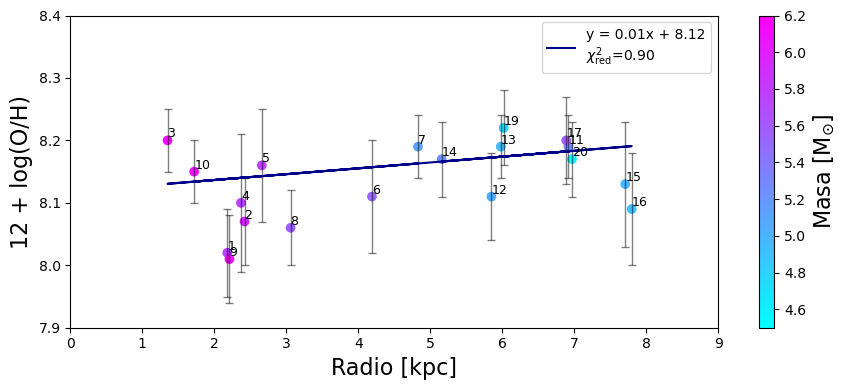

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Leer los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Variables
x = df['r_kpc'].values
y = df['12_LOG_OH_N2'].values
sigma_y = df['12_LOG_OH_N2_ERR'].values  # incertidumbre en y

# Ajuste lineal ponderado
weights = 1 / sigma_y**2
m, b = np.polyfit(x, y, deg=1, w=weights)

# Predicción y estadísticas
y_pred = m * x + b
chi_squared = np.sum((y - y_pred)**2 / sigma_y**2)
dof = len(x) - 2  # n_params = 2 (pendiente, intercepto)
reduced_chi_squared = chi_squared / dof
p_value = 1 - chi2.cdf(chi_squared, dof)

# Imprimir resultados
print(f"Pendiente:           {m:.4f}")
print(f"Intercepto:          {b:.4f}")
print(f"Chi-cuadrado:        {chi_squared:.2f}")
print(f"Chi-cuadrado red.:   {reduced_chi_squared:.2f}")
print(f"Grados de libertad:  {dof}")
print(f"p-valor del ajuste:  {p_value:.3f}")

# Graficar
plt.figure(figsize=(9, 4))

# Barras de error
plt.errorbar(
    x, y, yerr=sigma_y,
    fmt='none', ecolor='black',
    capsize=3, alpha=0.5, elinewidth=1
)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['mass'], cmap='cool', vmin=4.5, vmax=6.2)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)

# Etiquetar cada punto con su ID
for xi, yi, idi in zip(x, y, df['ID']):
    plt.text(
        xi, yi, str(int(idi)),
        fontsize=9, ha='left', va='bottom'
    )

# Línea de regresión
plt.plot(
    x, y_pred,
    color='darkblue',
    label=f"y = {m:.2f}x + {b:.2f}\n" +
          r"$\chi^2_{\rm red}$" + f"={reduced_chi_squared:.2f}"
)

plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(0, 9)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/3068287706.py:43: RuntimeWarning: Mean of empty slice
  combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)


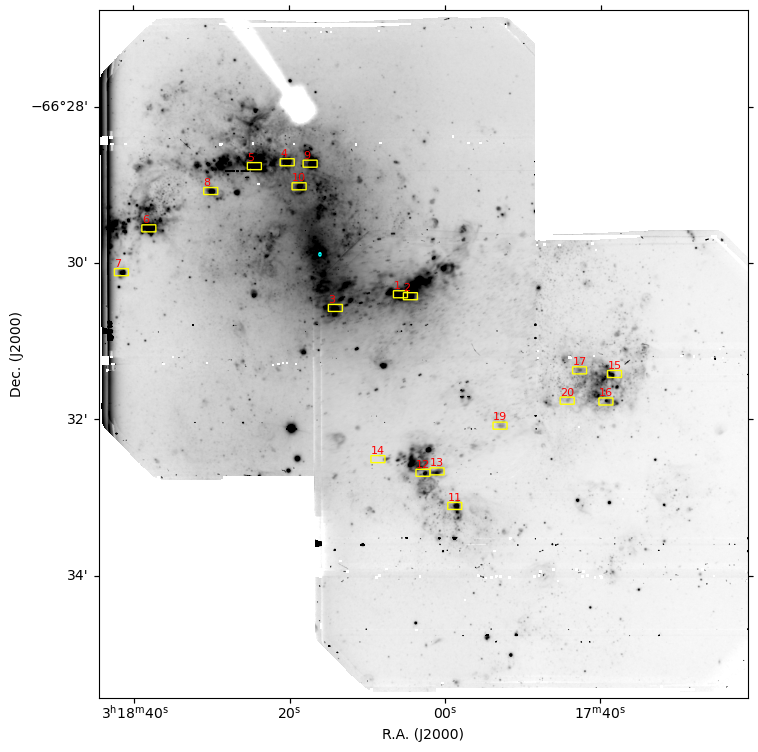

In [22]:
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle, Circle
import numpy as np
import pandas as pd

# --- Parámetros de las regiones ---
regions_file = 'output_scarano.csv'  # CSV con columnas: ID, RA, DEC
width_deg  = 0.0075  # Ancho del rectángulo en grados (ajusta a tus slits)
height_deg = 0.0015  # Alto del rectángulo en grados
# -----------------------------------

# Coordenadas centrales para el círculo azul
ra_center  = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0002  # ajusta el radio a tu gusto (en grados)

# Carga de datos FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1  = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2  = WCS(hdul2['SCI'].header)

# Enmascarar valores concretos
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# WCS y forma común
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])

# Reproyección
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)

# Combinación
combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)
combined = np.where(combined > 0, combined, np.nan)

# Leer regiones desde CSV
df_reg = pd.read_csv(regions_file)  # espera columnas ID, RA, DEC

# Plot
fig = plt.figure(figsize=(10, 8))
ax  = fig.add_subplot(111, projection=new_wcs)

norm = LogNorm(vmin=np.nanpercentile(combined, 1),
               vmax=np.nanpercentile(combined, 99))
ax.imshow(combined, origin='lower', cmap='gray_r', norm=norm)
# ax.plot(ra_center, dec_center,'b.')
ax.set_xlabel('R.A. (J2000)')
ax.set_ylabel('Dec. (J2000)')

# Añadir cada slit como rectángulo y su ID
for _, row in df_reg.iterrows():
    ra, dec = row['RA'], row['DEC']
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='yellow', facecolor='none', lw=1.0,
        transform=ax.get_transform('world')
    )
    ax.add_patch(rect)
    ax.text(
        ra + width_deg/2, dec + height_deg/2, str(row['ID']),
        color='red', fontsize=8,
        transform=ax.get_transform('world'),
        va='bottom', ha='left'
    )

#Añadir círculo azul en ra_center, dec_center
circle = Circle(
    (ra_center, dec_center),
    radius=circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=2.,
    transform=ax.get_transform('world')
)
ax.add_patch(circle)
ymin, ymax = ax.get_ylim()
plt.ylim(440, 3740)
plt.tight_layout()
plt.show()

In [14]:
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df['mass']


0     5.75
1     5.94
2     6.11
3     5.77
4     5.75
5     5.50
6     5.13
7     5.57
8     6.11
9     6.12
10    5.27
11    5.04
12    4.97
13    5.26
14    4.99
15    4.94
16    5.58
17    4.77
18    4.58
Name: mass, dtype: float64

<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/4215722946.py:18: SyntaxWarning: invalid escape sequence '\o'
  'mass': 'Masa [$log(M_*)[M_{\odot}]$]',
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/4215722946.py:57: RuntimeWarning: Mean of empty slice
  combined = np.nanmean([reproj1, reproj2], axis=0)


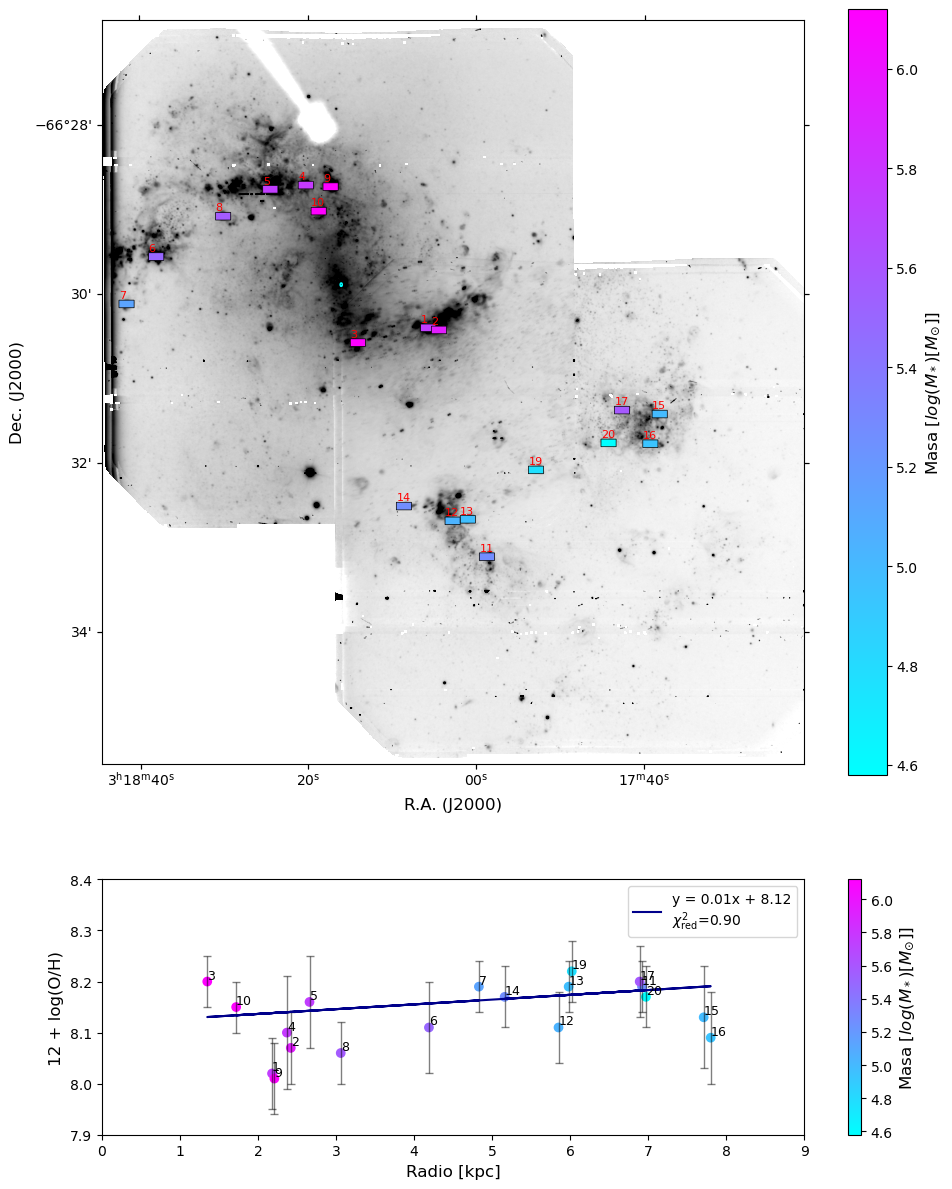

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Rectangle, Circle
from matplotlib.cm import ScalarMappable
from scipy.stats import chi2
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs

# Parámetro para las colorbars (cambiar según sea necesario: 'mass', '12_LOG_OH_N2', 'age')
color_param = 'mass'

# Etiquetas para las colorbars
param_labels = {
    'mass': 'Masa [$log(M_*)[M_{\odot}]$]',
    '12_LOG_OH_N2': '12 + log(O/H)',
    'age': 'Edad [Gyr]'  # Ajustar unidad si es necesario
}

# Cargar datos
df_gradient = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_slits = pd.read_csv('output_scarano.csv')

# Límites para la colorbar
vmin = df_gradient[color_param].min()
vmax = df_gradient[color_param].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.cool

# Parámetros de los slits
width_deg = 0.0075
height_deg = 0.0015
ra_center = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0002

# Cargar imágenes FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Enmascarar valores de bordes
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Reproyectar y combinar imágenes
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)
combined = np.nanmean([reproj1, reproj2], axis=0)
combined = np.where(combined > 0, combined, np.nan)

# Configurar figura
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [3, 1]}, subplot_kw={'projection': new_wcs} for ax1)


# Create the figure
fig = plt.figure(figsize=(10, 12))

# Define a grid with 2 rows and 1 column, with height ratios of 3:1
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])

# Add ax1 with the WCS projection
ax1 = fig.add_subplot(gs[0], projection=new_wcs)

# Add ax2 without a projection
ax2 = fig.add_subplot(gs[1])

# Gráfico superior: imagen de la galaxia
ax1.imshow(combined, origin='lower', cmap='gray_r', norm=LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99)))
ax1.set_xlabel('R.A. (J2000)', fontsize=12)
ax1.set_ylabel('Dec. (J2000)', fontsize=12)

# Añadir slits
for _, row in df_slits.iterrows():
    ra, dec, slit_id = row['RA'], row['DEC'], row['ID']
    # Buscar valor del parámetro para el ID
    param_value = df_gradient[df_gradient['ID'] == slit_id][color_param].values
    if len(param_value) > 0:
        color = cmap(norm(param_value[0]))
    else:
        color = 'gray'  # En caso de ID no encontrado
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='black', facecolor=color, lw=0.5,
        transform=ax1.get_transform('world')
    )
    ax1.add_patch(rect)
    ax1.text(
        ra + width_deg/2, dec + height_deg/2, str(int(slit_id)),
        color='red', fontsize=8, transform=ax1.get_transform('world'),
        va='bottom', ha='left'
    )

# Añadir círculo azul
circle = Circle(
    (ra_center, dec_center), circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=2,
    transform=ax1.get_transform('world')
)
ax1.add_patch(circle)
ax1.set_ylim(440, 3740)

# Barra de color para la imagen
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar1 = fig.colorbar(sm, ax=ax1)
cbar1.set_label(param_labels[color_param], fontsize=12)

# Gráfico inferior: gradiente de abundancia
x = df_gradient['r_kpc'].values
y = df_gradient['12_LOG_OH_N2'].values
sigma_y = df_gradient['12_LOG_OH_N2_ERR'].values

# Ajuste lineal ponderado
weights = 1 / sigma_y**2
m, b = np.polyfit(x, y, deg=1, w=weights)
y_pred = m * x + b
chi_squared = np.sum((y - y_pred)**2 / sigma_y**2)
dof = len(x) - 2
reduced_chi_squared = chi_squared / dof
p_value = 1 - chi2.cdf(chi_squared, dof)

# Barras de error
ax2.errorbar(x, y, yerr=sigma_y, fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter con colorbar
sc = ax2.scatter(x, y, c=df_gradient[color_param], cmap=cmap, vmin=vmin, vmax=vmax)

# Etiquetas de ID
for xi, yi, idi in zip(x, y, df_gradient['ID']):
    ax2.text(xi, yi, str(int(idi)), fontsize=9, ha='left', va='bottom')

# Línea de regresión
ax2.plot(x, y_pred, color='darkblue', label=f"y = {m:.2f}x + {b:.2f}\n" + r"$\chi^2_{\rm red}$" + f"={reduced_chi_squared:.2f}")
ax2.set_xlabel('Radio [kpc]', fontsize=12)
ax2.set_ylabel('12 + log(O/H)', fontsize=12)
ax2.set_xlim(0, 9)
ax2.set_ylim(7.9, 8.4)
ax2.legend()

# Barra de color para el gradiente
cbar2 = fig.colorbar(sc, ax=ax2)
cbar2.set_label(param_labels[color_param], fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

In [83]:
y_galaxy = y[0:10]
y_clouds = y[10:20]
y_galaxy,y,y_clouds

(array([8.02, 8.07, 8.2 , 8.1 , 8.16, 8.11, 8.19, 8.06, 8.01, 8.15]),
 array([8.02, 8.07, 8.2 , 8.1 , 8.16, 8.11, 8.19, 8.06, 8.01, 8.15, 8.19,
        8.11, 8.19, 8.17, 8.13, 8.09, 8.2 , 8.22, 8.17]),
 array([8.19, 8.11, 8.19, 8.17, 8.13, 8.09, 8.2 , 8.22, 8.17]))

<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:167: SyntaxWarning: invalid escape sequence '\c'
<>:168: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:167: SyntaxWarning: invalid escape sequence '\c'
<>:168: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/2265191705.py:18: SyntaxWarning: invalid escape sequence '\o'
  'mass': 'Masa [$log(M_*)[M_{\odot}]$]',
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/2265191705.py:167: SyntaxWarning: invalid escape sequence '\c'
  ax2.plot(x, m1 * x + b1, color='darkblue', label=f"Grupo 1: y = {m1:.2f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/2265191705.py:168: SyntaxWarning: invalid escape sequence '\c'
  ax2.plot(x, m2 * x + b2, color='darkred', label=f"Grupo 2: y = {m2:.2f}x + {b2:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared2:.2f}")


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/2265191705.py:61: RuntimeWarning: Mean of empty slice
  combined = np.nanmean([reproj1, reproj2], axis=0)


Grupo 1 (IDs 1-10):
Pendiente: 0.0046
Intercepto: 8.1268
Chi-cuadrado: 11.73
Chi-cuadrado red.: 1.47
Grados de libertad: 8
p-valor del ajuste: 0.164

Grupo 2 (IDs 11-17, 19-20):
Pendiente: -0.0035
Intercepto: 8.2032
Chi-cuadrado: 2.86
Chi-cuadrado red.: 0.41
Grados de libertad: 7
p-valor del ajuste: 0.898


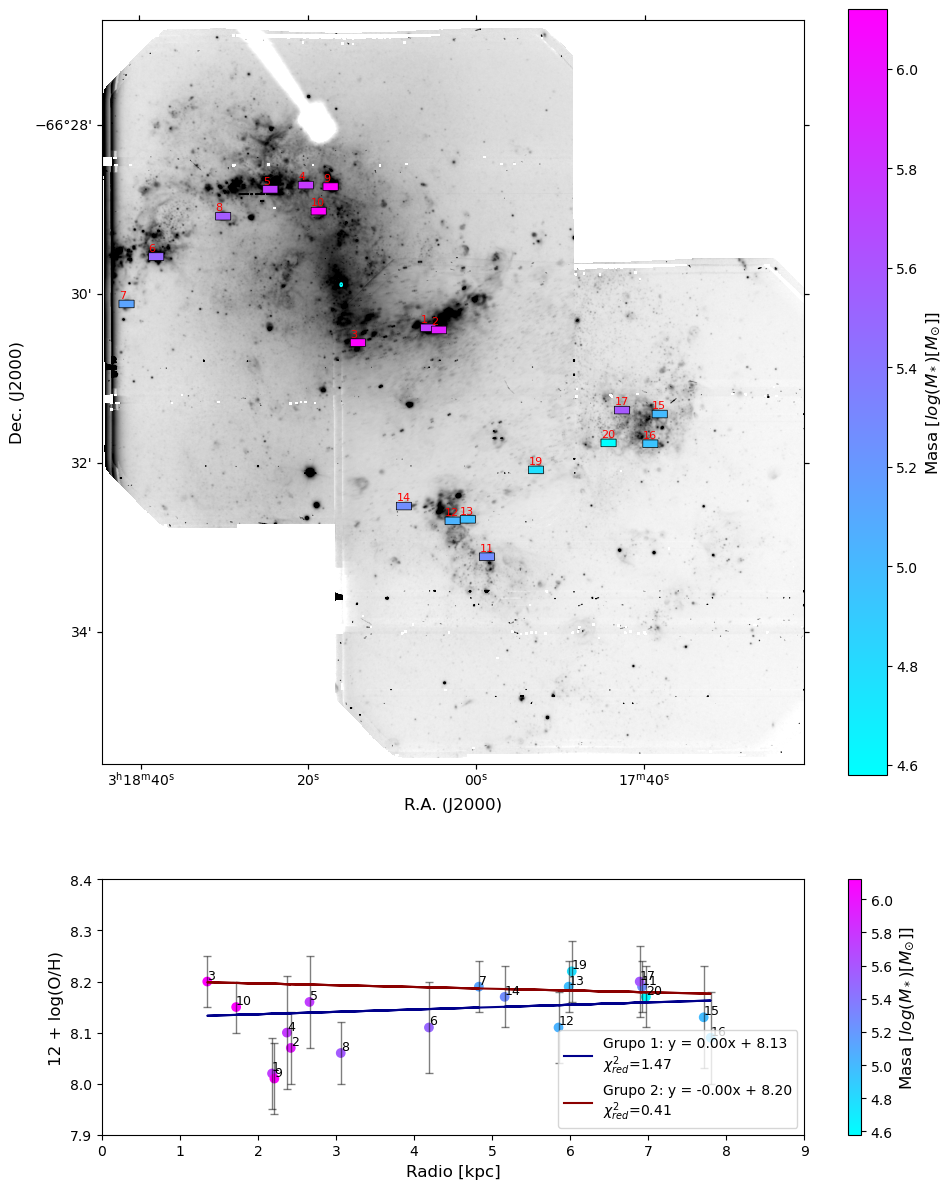

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Rectangle, Circle
from matplotlib.cm import ScalarMappable
from scipy.stats import chi2
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs

# Parámetro para las colorbars
color_param = 'mass'

# Etiquetas para las colorbars
param_labels = {
    'mass': 'Masa [$log(M_*)[M_{\odot}]$]',
    '12_LOG_OH_N2': '12 + log(O/H)',
    'age': 'Edad [Gyr]'
}

# Cargar datos
df_gradient = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_slits = pd.read_csv('output_scarano.csv')

# Definir grupos basados en ID
group1 = df_gradient[df_gradient['ID'].between(1, 10)]
group2 = df_gradient[df_gradient['ID'].isin(list(range(11, 18)) + list(range(19, 21)))]

# Límites para la colorbar
vmin = df_gradient[color_param].min()
vmax = df_gradient[color_param].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.cool

# Parámetros de los slits
width_deg = 0.0075
height_deg = 0.0015
ra_center = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0002

# Cargar imágenes FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Enmascarar valores de bordes
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Reproyectar y combinar imágenes
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)
combined = np.nanmean([reproj1, reproj2], axis=0)
combined = np.where(combined > 0, combined, np.nan)

# Configurar figura
fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0], projection=new_wcs)
ax2 = fig.add_subplot(gs[1])

# Gráfico superior: imagen de la galaxia
ax1.imshow(combined, origin='lower', cmap='gray_r', norm=LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99)))
ax1.set_xlabel('R.A. (J2000)', fontsize=12)
ax1.set_ylabel('Dec. (J2000)', fontsize=12)

# Añadir slits
for _, row in df_slits.iterrows():
    ra, dec, slit_id = row['RA'], row['DEC'], row['ID']
    param_value = df_gradient[df_gradient['ID'] == slit_id][color_param].values
    if len(param_value) > 0:
        color = cmap(norm(param_value[0]))
    else:
        color = 'gray'
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='black', facecolor=color, lw=0.5,
        transform=ax1.get_transform('world')
    )
    ax1.add_patch(rect)
    ax1.text(
        ra + width_deg/2, dec + height_deg/2, str(int(slit_id)),
        color='red', fontsize=8, transform=ax1.get_transform('world'),
        va='bottom', ha='left'
    )

# Añadir círculo azul
circle = Circle(
    (ra_center, dec_center), circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=2,
    transform=ax1.get_transform('world')
)
ax1.add_patch(circle)
ax1.set_ylim(440, 3740)

# Barra de color para la imagen
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar1 = fig.colorbar(sm, ax=ax1)
cbar1.set_label(param_labels[color_param], fontsize=12)

# Gráfico inferior: gradiente de abundancia
x = df_gradient['r_kpc'].values
y = df_gradient['12_LOG_OH_N2'].values
sigma_y = df_gradient['12_LOG_OH_N2_ERR'].values

# Ajuste lineal ponderado para Grupo 1
x1 = group1['r_kpc'].values
y1 = group1['12_LOG_OH_N2'].values
sigma_y1 = group1['12_LOG_OH_N2_ERR'].values
weights1 = 1 / sigma_y1**2
m1, b1 = np.polyfit(x1, y1, deg=1, w=weights1)
y_pred1 = m1 * x1 + b1
chi_squared1 = np.sum((y1 - y_pred1)**2 / sigma_y1**2)
dof1 = len(x1) - 2
reduced_chi_squared1 = chi_squared1 / dof1
p_value1 = 1 - chi2.cdf(chi_squared1, dof1)

# Ajuste lineal ponderado para Grupo 2
x2 = group2['r_kpc'].values
y2 = group2['12_LOG_OH_N2'].values
sigma_y2 = group2['12_LOG_OH_N2_ERR'].values
weights2 = 1 / sigma_y2**2
m2, b2 = np.polyfit(x2, y2, deg=1, w=weights2)
y_pred2 = m2 * x2 + b2
chi_squared2 = np.sum((y2 - y_pred2)**2 / sigma_y2**2)
dof2 = len(x2) - 2
reduced_chi_squared2 = chi_squared2 / dof2
p_value2 = 1 - chi2.cdf(chi_squared2, dof2)

# Imprimir estadísticas
print("Grupo 1 (IDs 1-10):")
print(f"Pendiente: {m1:.4f}")
print(f"Intercepto: {b1:.4f}")
print(f"Chi-cuadrado: {chi_squared1:.2f}")
print(f"Chi-cuadrado red.: {reduced_chi_squared1:.2f}")
print(f"Grados de libertad: {dof1}")
print(f"p-valor del ajuste: {p_value1:.3f}")
print("\nGrupo 2 (IDs 11-17, 19-20):")
print(f"Pendiente: {m2:.4f}")
print(f"Intercepto: {b2:.4f}")
print(f"Chi-cuadrado: {chi_squared2:.2f}")
print(f"Chi-cuadrado red.: {reduced_chi_squared2:.2f}")
print(f"Grados de libertad: {dof2}")
print(f"p-valor del ajuste: {p_value2:.3f}")

# Barras de error
ax2.errorbar(x, y, yerr=sigma_y, fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter con colorbar
sc = ax2.scatter(x, y, c=df_gradient[color_param], cmap=cmap, vmin=vmin, vmax=vmax)

# Etiquetas de ID
for xi, yi, idi in zip(x, y, df_gradient['ID']):
    ax2.text(xi, yi, str(int(idi)), fontsize=9, ha='left', va='bottom')

# Líneas de regresión
ax2.plot(x, m1 * x + b1, color='darkblue', label=f"Grupo 1: y = {m1:.2f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")
ax2.plot(x, m2 * x + b2, color='darkred', label=f"Grupo 2: y = {m2:.2f}x + {b2:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared2:.2f}")
ax2.set_xlabel('Radio [kpc]', fontsize=12)
ax2.set_ylabel('12 + log(O/H)', fontsize=12)
ax2.set_xlim(0, 9)
ax2.set_ylim(7.9, 8.4)
ax2.legend()

# Barra de color para el gradiente
cbar2 = fig.colorbar(sc, ax=ax2)
cbar2.set_label(param_labels[color_param], fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:168: SyntaxWarning: invalid escape sequence '\c'
<>:172: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:168: SyntaxWarning: invalid escape sequence '\c'
<>:172: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/2463409852.py:17: SyntaxWarning: invalid escape sequence '\o'
  'mass': 'Masa [$log(M_*)[M_{\odot}]$]',
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/2463409852.py:168: SyntaxWarning: invalid escape sequence '\c'
  ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Grupo 1: y = {m1:.2f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/2463409852.py:172: SyntaxWarning: invalid escape sequence '\c'
  ax2.plot(x_fit2, y_fit2, color='darkred', label=f"Grupo 2: y = {m2:.2f}x + {b2:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared2:.2f}")
t

Grupo 1 (IDs 1-10):
Pendiente: 0.0046
Intercepto: 8.1268
Chi-cuadrado: 11.73
Chi-cuadrado red.: 1.47
Grados de libertad: 8
p-valor del ajuste: 0.164

Grupo 2 (IDs 11-19):
Pendiente: -0.0016
Intercepto: 8.1926
Chi-cuadrado: 2.91
Chi-cuadrado red.: 0.48
Grados de libertad: 6
p-valor del ajuste: 0.820


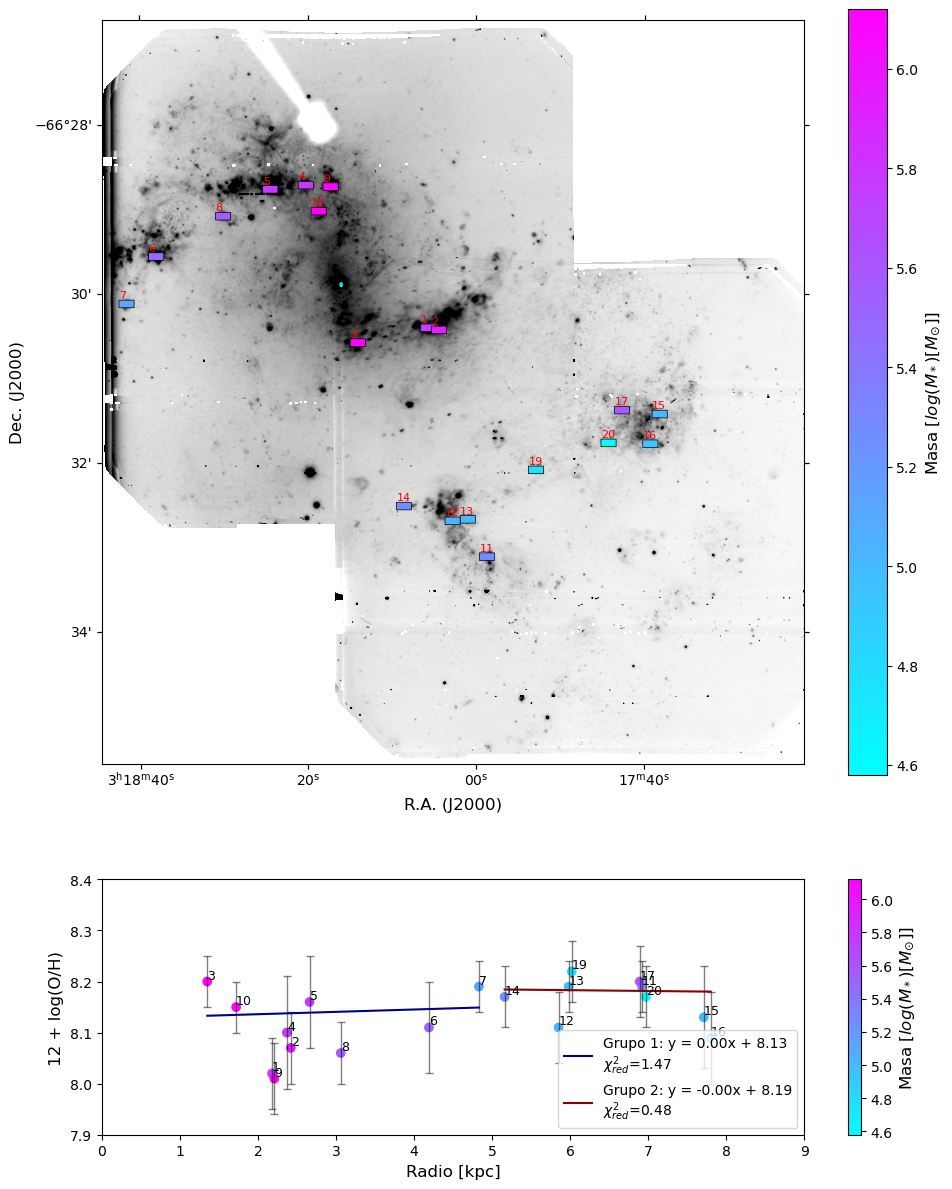

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Rectangle, Circle
from matplotlib.cm import ScalarMappable
from scipy.stats import chi2
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs

# Parámetro para las colorbars
color_param = 'mass'

param_labels = {
    'mass': 'Masa $log(M_*)[M_{\odot}]$',
    '12_LOG_OH_N2': '12 + log(O/H)',
    'age': 'Edad [Gyr]'
}

# Cargar datos
df_gradient = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_slits = pd.read_csv('output_scarano.csv')

# Definir grupos basados en ID
group1 = df_gradient[df_gradient['ID'].between(1, 10)]
group2 = df_gradient[df_gradient['ID'].between(11, 19)]

# Límites para la colorbar
vmin = df_gradient[color_param].min()
vmax = df_gradient[color_param].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.cool

# Parámetros de los slits
width_deg = 0.0075
height_deg = 0.0015
ra_center = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0002

# Cargar imágenes FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Enmascarar valores de bordes
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Reproyectar y combinar imágenes
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)
combined = np.nanmean([reproj1, reproj2], axis=0)
combined = np.where(combined > 0, combined, np.nan)

# Configurar figura
fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0], projection=new_wcs)
ax2 = fig.add_subplot(gs[1])

# Gráfico superior: imagen de la galaxia
ax1.imshow(combined, origin='lower', cmap='gray_r', norm=LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99)))
ax1.set_xlabel('R.A. (J2000)', fontsize=12)
ax1.set_ylabel('Dec. (J2000)', fontsize=12)

# Añadir slits
for _, row in df_slits.iterrows():
    ra, dec, slit_id = row['RA'], row['DEC'], row['ID']
    param_value = df_gradient[df_gradient['ID'] == slit_id][color_param].values
    if len(param_value) > 0:
        color = cmap(norm(param_value[0]))
    else:
        color = 'gray'
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='black', facecolor=color, lw=0.5,
        transform=ax1.get_transform('world')
    )
    ax1.add_patch(rect)
    ax1.text(
        ra + width_deg/2, dec + height_deg/2, str(int(slit_id)),
        color='red', fontsize=8, transform=ax1.get_transform('world'),
        va='bottom', ha='left'
    )

# Añadir círculo azul
circle = Circle(
    (ra_center, dec_center), circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=2,
    transform=ax1.get_transform('world')
)
ax1.add_patch(circle)
ax1.set_ylim(440, 3740)

# Barra de color para la imagen
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar1 = fig.colorbar(sm, ax=ax1)
cbar1.set_label(param_labels[color_param], fontsize=12)

# Gráfico inferior: gradiente de abundancia
x = df_gradient['r_kpc'].values
y = df_gradient['12_LOG_OH_N2'].values
sigma_y = df_gradient['12_LOG_OH_N2_ERR'].values

# Ajuste lineal ponderado para Grupo 1
x1 = group1['r_kpc'].values
y1 = group1['12_LOG_OH_N2'].values
sigma_y1 = group1['12_LOG_OH_N2_ERR'].values
weights1 = 1 / sigma_y1**2
m1, b1 = np.polyfit(x1, y1, deg=1, w=weights1)
y_pred1 = m1 * x1 + b1
chi_squared1 = np.sum((y1 - y_pred1)**2 / sigma_y1**2)
dof1 = len(x1) - 2
reduced_chi_squared1 = chi_squared1 / dof1
p_value1 = 1 - chi2.cdf(chi_squared1, dof1)

# Ajuste lineal ponderado para Grupo 2
x2 = group2['r_kpc'].values
y2 = group2['12_LOG_OH_N2'].values
sigma_y2 = group2['12_LOG_OH_N2_ERR'].values
weights2 = 1 / sigma_y2**2
m2, b2 = np.polyfit(x2, y2, deg=1, w=weights2)
y_pred2 = m2 * x2 + b2
chi_squared2 = np.sum((y2 - y_pred2)**2 / sigma_y2**2)
dof2 = len(x2) - 2
reduced_chi_squared2 = chi_squared2 / dof2
p_value2 = 1 - chi2.cdf(chi_squared2, dof2)

# Imprimir estadísticas
print("Grupo 1 (IDs 1-10):")
print(f"Pendiente: {m1:.4f}")
print(f"Intercepto: {b1:.4f}")
print(f"Chi-cuadrado: {chi_squared1:.2f}")
print(f"Chi-cuadrado red.: {reduced_chi_squared1:.2f}")
print(f"Grados de libertad: {dof1}")
print(f"p-valor del ajuste: {p_value1:.3f}")
print("\nGrupo 2 (IDs 11-19):")
print(f"Pendiente: {m2:.4f}")
print(f"Intercepto: {b2:.4f}")
print(f"Chi-cuadrado: {chi_squared2:.2f}")
print(f"Chi-cuadrado red.: {reduced_chi_squared2:.2f}")
print(f"Grados de libertad: {dof2}")
print(f"p-valor del ajuste: {p_value2:.3f}")

# Barras de error
ax2.errorbar(x, y, yerr=sigma_y, fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter con colorbar
sc = ax2.scatter(x, y, c=df_gradient[color_param], cmap=cmap, vmin=vmin, vmax=vmax)

# Etiquetas de ID
for xi, yi, idi in zip(x, y, df_gradient['ID']):
    ax2.text(xi, yi, str(int(idi)), fontsize=9, ha='left', va='bottom')

# Líneas de regresión en sus respectivos rangos
x_fit1 = np.linspace(np.min(x1), np.max(x1), 100)
y_fit1 = m1 * x_fit1 + b1
ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Grupo 1: y = {m1:.2f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")

x_fit2 = np.linspace(np.min(x2), np.max(x2), 100)
y_fit2 = m2 * x_fit2 + b2
ax2.plot(x_fit2, y_fit2, color='darkred', label=f"Grupo 2: y = {m2:.2f}x + {b2:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared2:.2f}")

ax2.set_xlabel('Radio [kpc]', fontsize=12)
ax2.set_ylabel('12 + log(O/H)', fontsize=12)
ax2.set_xlim(0, 9)
ax2.set_ylim(7.9, 8.4)
ax2.legend()



# Barra de color para el gradiente
cbar2 = fig.colorbar(sc, ax=ax2)
cbar2.set_label(param_labels[color_param], fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:168: SyntaxWarning: invalid escape sequence '\c'
<>:172: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:168: SyntaxWarning: invalid escape sequence '\c'
<>:172: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/3948642650.py:17: SyntaxWarning: invalid escape sequence '\o'
  'mass': '$log(M_*)[M_{\odot}]$',
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/3948642650.py:168: SyntaxWarning: invalid escape sequence '\c'
  line1, = ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Galaxy = {m1:.3f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1185/3948642650.py:172: SyntaxWarning: invalid escape sequence '\c'
  line2, = ax2.plot(x_fit2, y_fit2, color='darkred', label=f"Clouds = {m2:.3f}x + {b2:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared2:.2f}"

Grupo 1 (IDs 1-10):
Pendiente: 0.0046
Intercepto: 8.1268
Chi-cuadrado: 11.73
Chi-cuadrado red.: 1.47
Grados de libertad: 8
p-valor del ajuste: 0.164

Grupo 2 (IDs 11-19):
Pendiente: -0.0016
Intercepto: 8.1926
Chi-cuadrado: 2.91
Chi-cuadrado red.: 0.48
Grados de libertad: 6
p-valor del ajuste: 0.820


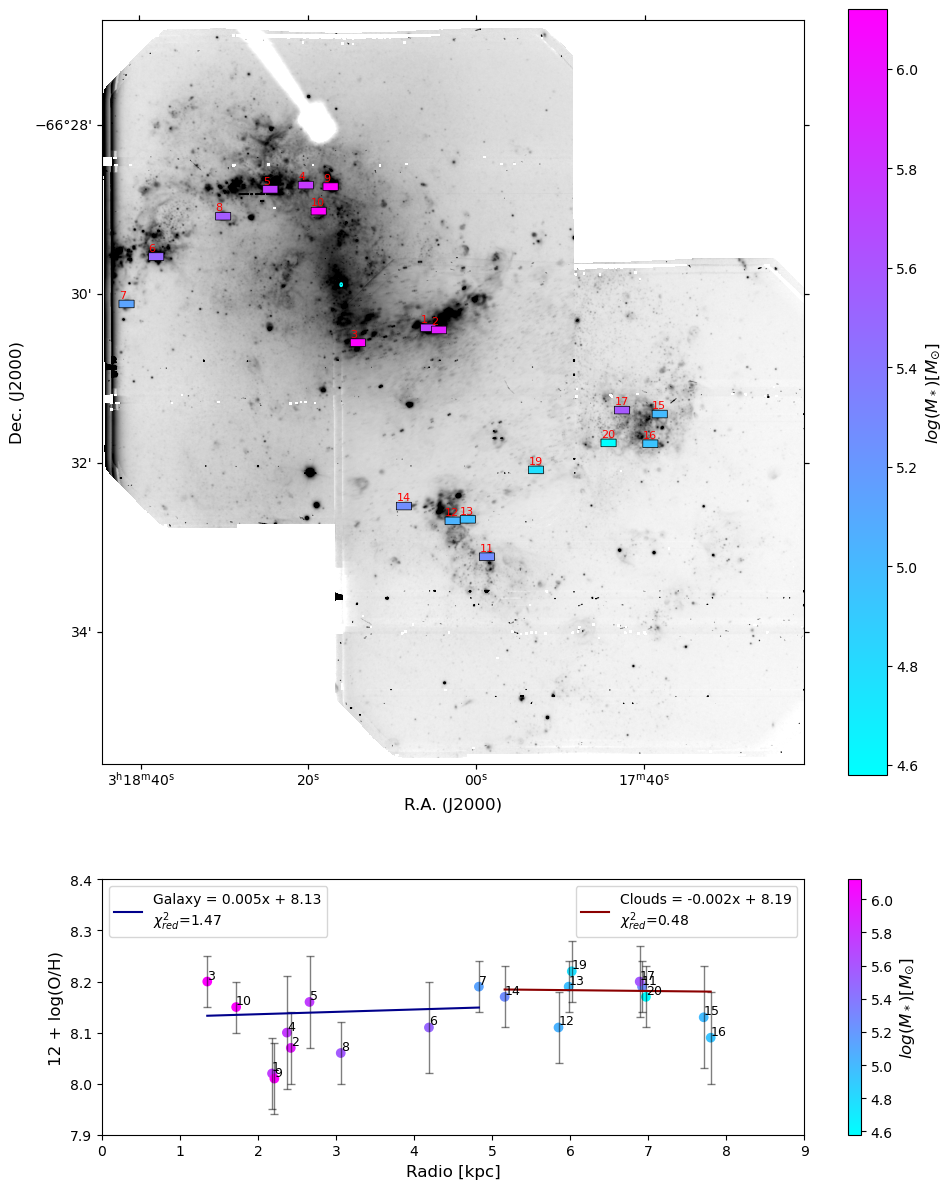

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Rectangle, Circle
from matplotlib.cm import ScalarMappable
from scipy.stats import chi2
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs

# Parámetro para las colorbars
color_param = 'mass'

param_labels = {
    'mass': '$log(M_*)[M_{\odot}]$',
    '12_LOG_OH_N2': '12 + log(O/H)',
    'age': 'Edad [Gyr]'
}

# Cargar datos
df_gradient = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_slits = pd.read_csv('output_scarano.csv')

# Definir grupos basados en ID
group1 = df_gradient[df_gradient['ID'].between(1, 10)]
group2 = df_gradient[df_gradient['ID'].between(11, 19)]

# Límites para la colorbar
vmin = df_gradient[color_param].min()
vmax = df_gradient[color_param].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.cool

# Parámetros de los slits
width_deg = 0.0075
height_deg = 0.0015
ra_center = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0002

# Cargar imágenes FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Enmascarar valores de bordes
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Reproyectar y combinar imágenes
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)
combined = np.nanmean([reproj1, reproj2], axis=0)
combined = np.where(combined > 0, combined, np.nan)

# Configurar figura
fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0], projection=new_wcs)
ax2 = fig.add_subplot(gs[1])

# Gráfico superior: imagen de la galaxia
ax1.imshow(combined, origin='lower', cmap='gray_r', norm=LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99)))
ax1.set_xlabel('R.A. (J2000)', fontsize=12)
ax1.set_ylabel('Dec. (J2000)', fontsize=12)

# Añadir slits
for _, row in df_slits.iterrows():
    ra, dec, slit_id = row['RA'], row['DEC'], row['ID']
    param_value = df_gradient[df_gradient['ID'] == slit_id][color_param].values
    if len(param_value) > 0:
        color = cmap(norm(param_value[0]))
    else:
        color = 'gray'
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='black', facecolor=color, lw=0.5,
        transform=ax1.get_transform('world')
    )
    ax1.add_patch(rect)
    ax1.text(
        ra + width_deg/2, dec + height_deg/2, str(int(slit_id)),
        color='red', fontsize=8, transform=ax1.get_transform('world'),
        va='bottom', ha='left'
    )

# Añadir círculo azul
circle = Circle(
    (ra_center, dec_center), circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=2,
    transform=ax1.get_transform('world')
)
ax1.add_patch(circle)
ax1.set_ylim(440, 3740)

# Barra de color para la imagen
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar1 = fig.colorbar(sm, ax=ax1)
cbar1.set_label(param_labels[color_param], fontsize=12)

# Gráfico inferior: gradiente de abundancia
x = df_gradient['r_kpc'].values
y = df_gradient['12_LOG_OH_N2'].values
sigma_y = df_gradient['12_LOG_OH_N2_ERR'].values

# Ajuste lineal ponderado para Grupo 1
x1 = group1['r_kpc'].values
y1 = group1['12_LOG_OH_N2'].values
sigma_y1 = group1['12_LOG_OH_N2_ERR'].values
weights1 = 1 / sigma_y1**2
m1, b1 = np.polyfit(x1, y1, deg=1, w=weights1)
y_pred1 = m1 * x1 + b1
chi_squared1 = np.sum((y1 - y_pred1)**2 / sigma_y1**2)
dof1 = len(x1) - 2
reduced_chi_squared1 = chi_squared1 / dof1
p_value1 = 1 - chi2.cdf(chi_squared1, dof1)

# Ajuste lineal ponderado para Grupo 2
x2 = group2['r_kpc'].values
y2 = group2['12_LOG_OH_N2'].values
sigma_y2 = group2['12_LOG_OH_N2_ERR'].values
weights2 = 1 / sigma_y2**2
m2, b2 = np.polyfit(x2, y2, deg=1, w=weights2)
y_pred2 = m2 * x2 + b2
chi_squared2 = np.sum((y2 - y_pred2)**2 / sigma_y2**2)
dof2 = len(x2) - 2
reduced_chi_squared2 = chi_squared2 / dof2
p_value2 = 1 - chi2.cdf(chi_squared2, dof2)

# Imprimir estadísticas
print("Grupo 1 (IDs 1-10):")
print(f"Pendiente: {m1:.4f}")
print(f"Intercepto: {b1:.4f}")
print(f"Chi-cuadrado: {chi_squared1:.2f}")
print(f"Chi-cuadrado red.: {reduced_chi_squared1:.2f}")
print(f"Grados de libertad: {dof1}")
print(f"p-valor del ajuste: {p_value1:.3f}")
print("\nGrupo 2 (IDs 11-19):")
print(f"Pendiente: {m2:.4f}")
print(f"Intercepto: {b2:.4f}")
print(f"Chi-cuadrado: {chi_squared2:.2f}")
print(f"Chi-cuadrado red.: {reduced_chi_squared2:.2f}")
print(f"Grados de libertad: {dof2}")
print(f"p-valor del ajuste: {p_value2:.3f}")

# Barras de error
ax2.errorbar(x, y, yerr=sigma_y, fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter con colorbar
sc = ax2.scatter(x, y, c=df_gradient[color_param], cmap=cmap, vmin=vmin, vmax=vmax)

# Etiquetas de ID
for xi, yi, idi in zip(x, y, df_gradient['ID']):
    ax2.text(xi, yi, str(int(idi)), fontsize=9, ha='left', va='bottom')

# Líneas de regresión en sus respectivos rangos con handles
x_fit1 = np.linspace(np.min(x1), np.max(x1), 100)
y_fit1 = m1 * x_fit1 + b1
line1, = ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Galaxy = {m1:.3f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")

x_fit2 = np.linspace(np.min(x2), np.max(x2), 100)
y_fit2 = m2 * x_fit2 + b2
line2, = ax2.plot(x_fit2, y_fit2, color='darkred', label=f"Clouds = {m2:.3f}x + {b2:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared2:.2f}")

# Crear la primera leyenda para Grupo 1 en upper left
legend1 = ax2.legend(handles=[line1], loc='upper left')
ax2.add_artist(legend1)

# Crear la segunda leyenda para Grupo 2 en upper right
ax2.legend(handles=[line2], loc='upper right')

ax2.set_xlabel('Radio [kpc]', fontsize=12)
ax2.set_ylabel('12 + log(O/H)', fontsize=12)
ax2.set_xlim(0, 9)
ax2.set_ylim(7.9, 8.4)

# Barra de color para el gradiente
cbar2 = fig.colorbar(sc, ax=ax2)
cbar2.set_label(param_labels[color_param], fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:188: SyntaxWarning: invalid escape sequence '\c'
<>:193: SyntaxWarning: invalid escape sequence '\c'
<>:198: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:188: SyntaxWarning: invalid escape sequence '\c'
<>:193: SyntaxWarning: invalid escape sequence '\c'
<>:198: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1590/1385974975.py:17: SyntaxWarning: invalid escape sequence '\o'
  'mass': '$log(M_*)[M_{\odot}]$',
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1590/1385974975.py:188: SyntaxWarning: invalid escape sequence '\c'
  line1, = ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Galaxy left = {m1:.3f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1590/1385974975.py:193: SyntaxWarning: invalid escape sequence '\c'
  line2, = ax2.plot(x_fit2,

Lado Izquierdo (signed_distance_kpc < 0):
Pendiente: -0.0184
Intercepto: 8.0882
Chi-cuadrado red.: 1.13

Galaxia (Derecho, IDs 1-3, signed_distance_kpc >= 0):
Pendiente: -0.1240
Intercepto: 8.3292
Chi-cuadrado red.: 0.62

Nubes (IDs 11-19):
Pendiente: 0.0031
Intercepto: 8.1649
Chi-cuadrado red.: 0.51


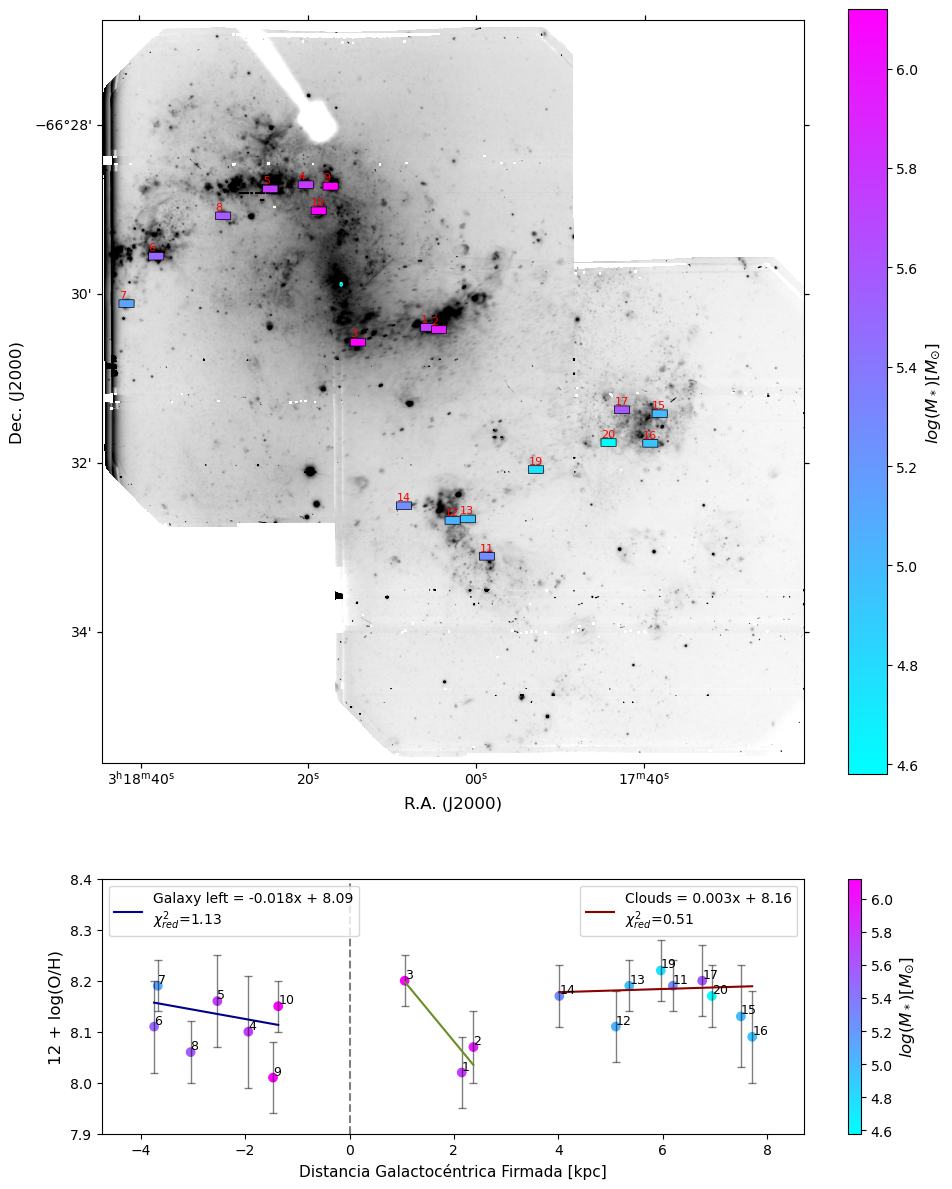

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Rectangle, Circle
from matplotlib.cm import ScalarMappable
from scipy.stats import chi2
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs

# Parámetro para las colorbars
color_param = 'mass'

param_labels = {
    'mass': '$log(M_*)[M_{\odot}]$',
    '12_LOG_OH_N2': '12 + log(O/H)',
    'age': 'Edad [Gyr]'
}

# Cargar datos
df_gradient = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_slits = pd.read_csv('output_scarano.csv')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')
df_gradient = pd.merge(df_gradient, df_signed, on='ID')

# Definir grupos
group_left = df_gradient[df_gradient['signed_distance_kpc'] < 0]
group_right_galaxy = df_gradient[(df_gradient['signed_distance_kpc'] >= 0) & (df_gradient['ID'].isin([1, 2, 3]))]
group_clouds = df_gradient[df_gradient['ID'].isin(range(11, 20))]

# Límites para la colorbar
vmin = df_gradient[color_param].min()
vmax = df_gradient[color_param].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.cool

# Parámetros de los slits
width_deg = 0.0075
height_deg = 0.0015
ra_center = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0002

# Cargar imágenes FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Enmascarar valores de bordes
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Reproyectar y combinar imágenes
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)
combined = np.nanmean([reproj1, reproj2], axis=0)
combined = np.where(combined > 0, combined, np.nan)

# Configurar figura
fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0], projection=new_wcs)
ax2 = fig.add_subplot(gs[1])

# Gráfico superior: imagen de la galaxia
ax1.imshow(combined, origin='lower', cmap='gray_r', norm=LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99)))
ax1.set_xlabel('R.A. (J2000)', fontsize=12)
ax1.set_ylabel('Dec. (J2000)', fontsize=12)

# Añadir slits
for _, row in df_slits.iterrows():
    ra, dec, slit_id = row['RA'], row['DEC'], row['ID']
    param_value = df_gradient[df_gradient['ID'] == slit_id][color_param].values
    if len(param_value) > 0:
        color = cmap(norm(param_value[0]))
    else:
        color = 'gray'
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='black', facecolor=color, lw=0.5,
        transform=ax1.get_transform('world')
    )
    ax1.add_patch(rect)
    ax1.text(
        ra + width_deg/2, dec + height_deg/2, str(int(slit_id)),
        color='red', fontsize=8, transform=ax1.get_transform('world'),
        va='bottom', ha='left'
    )

# Añadir círculo azul
circle = Circle(
    (ra_center, dec_center), circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=2,
    transform=ax1.get_transform('world')
)
ax1.add_patch(circle)
ax1.set_ylim(440, 3740)

# Barra de color para la imagen
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar1 = fig.colorbar(sm, ax=ax1)
cbar1.set_label(param_labels[color_param], fontsize=12)

# Gráfico inferior: gradiente galactocéntrico
x = df_gradient['signed_distance_kpc'].values
y = df_gradient['12_LOG_OH_N2'].values
sigma_y = df_gradient['12_LOG_OH_N2_ERR'].values

# Ajuste lineal ponderado para Lado Izquierdo
if len(group_left) > 1:
    x1 = group_left['signed_distance_kpc'].values
    y1 = group_left['12_LOG_OH_N2'].values
    sigma_y1 = group_left['12_LOG_OH_N2_ERR'].values
    weights1 = 1 / sigma_y1**2
    m1, b1 = np.polyfit(x1, y1, deg=1, w=weights1)
    y_pred1 = m1 * x1 + b1
    chi_squared1 = np.sum((y1 - y_pred1)**2 / sigma_y1**2)
    dof1 = len(x1) - 2
    reduced_chi_squared1 = chi_squared1 / dof1 if dof1 > 0 else np.nan
else:
    m1, b1, reduced_chi_squared1 = np.nan, np.nan, np.nan

# Ajuste lineal ponderado para Galaxia (Derecho)
if len(group_right_galaxy) > 1:
    x2 = group_right_galaxy['signed_distance_kpc'].values
    y2 = group_right_galaxy['12_LOG_OH_N2'].values
    sigma_y2 = group_right_galaxy['12_LOG_OH_N2_ERR'].values
    weights2 = 1 / sigma_y2**2
    m2, b2 = np.polyfit(x2, y2, deg=1, w=weights2)
    y_pred2 = m2 * x2 + b2
    chi_squared2 = np.sum((y2 - y_pred2)**2 / sigma_y2**2)
    dof2 = len(x2) - 2
    reduced_chi_squared2 = chi_squared2 / dof2 if dof2 > 0 else np.nan
else:
    m2, b2, reduced_chi_squared2 = np.nan, np.nan, np.nan

# Ajuste lineal ponderado para Nubes
if len(group_clouds) > 1:
    x3 = group_clouds['signed_distance_kpc'].values
    y3 = group_clouds['12_LOG_OH_N2'].values
    sigma_y3 = group_clouds['12_LOG_OH_N2_ERR'].values
    weights3 = 1 / sigma_y3**2
    m3, b3 = np.polyfit(x3, y3, deg=1, w=weights3)
    y_pred3 = m3 * x3 + b3
    chi_squared3 = np.sum((y3 - y_pred3)**2 / sigma_y3**2)
    dof3 = len(x3) - 2
    reduced_chi_squared3 = chi_squared3 / dof3 if dof3 > 0 else np.nan
else:
    m3, b3, reduced_chi_squared3 = np.nan, np.nan, np.nan

# Imprimir estadísticas
print("Lado Izquierdo (signed_distance_kpc < 0):")
print(f"Pendiente: {m1:.4f}" if not np.isnan(m1) else "Pendiente: N/A")
print(f"Intercepto: {b1:.4f}" if not np.isnan(b1) else "Intercepto: N/A")
print(f"Chi-cuadrado red.: {reduced_chi_squared1:.2f}" if not np.isnan(reduced_chi_squared1) else "Chi-cuadrado red.: N/A")
print("\nGalaxia (Derecho, IDs 1-3, signed_distance_kpc >= 0):")
print(f"Pendiente: {m2:.4f}" if not np.isnan(m2) else "Pendiente: N/A")
print(f"Intercepto: {b2:.4f}" if not np.isnan(b2) else "Intercepto: N/A")
print(f"Chi-cuadrado red.: {reduced_chi_squared2:.2f}" if not np.isnan(reduced_chi_squared2) else "Chi-cuadrado red.: N/A")
print("\nNubes (IDs 11-19):")
print(f"Pendiente: {m3:.4f}" if not np.isnan(m3) else "Pendiente: N/A")
print(f"Intercepto: {b3:.4f}" if not np.isnan(b3) else "Intercepto: N/A")
print(f"Chi-cuadrado red.: {reduced_chi_squared3:.2f}" if not np.isnan(reduced_chi_squared3) else "Chi-cuadrado red.: N/A")

# Barras de error
ax2.errorbar(x, y, yerr=sigma_y, fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter con colorbar
sc = ax2.scatter(x, y, c=df_gradient[color_param], cmap=cmap, vmin=vmin, vmax=vmax)

# Etiquetas de ID
for xi, yi, idi in zip(x, y, df_gradient['ID']):
    ax2.text(xi, yi, str(int(idi)), fontsize=9, ha='left', va='bottom')

# Líneas de regresión
if len(group_left) > 1 and not np.isnan(m1):
    x_fit1 = np.linspace(np.min(x1), np.max(x1), 100)
    y_fit1 = m1 * x_fit1 + b1
    line1, = ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Galaxy left = {m1:.3f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")

if len(group_right_galaxy) > 1 and not np.isnan(m2):
    x_fit2 = np.linspace(np.min(x2), np.max(x2), 100)
    y_fit2 = m2 * x_fit2 + b2
    line2, = ax2.plot(x_fit2, y_fit2, color='olivedrab', label=f"Galaxy right = {m2:.3f}x + {b2:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared2:.2f}")

if len(group_clouds) > 1 and not np.isnan(m3):
    x_fit3 = np.linspace(np.min(x3), np.max(x3), 100)
    y_fit3 = m3 * x_fit3 + b3
    line3, = ax2.plot(x_fit3, y_fit3, color='darkred', label=f"Clouds = {m3:.3f}x + {b3:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared3:.2f}")

# Línea vertical en x=0
ax2.axvline(0, linestyle='--', color='gray')

# Leyendas
if len(group_left) > 1 and not np.isnan(m1):
    legend1 = ax2.legend(handles=[line1], loc='upper left')
    ax2.add_artist(legend1)
if len(group_right_galaxy) > 1 and not np.isnan(m2):
    ax2.legend(handles=[line2], loc='upper center')
if len(group_clouds) > 1 and not np.isnan(m3):
    ax2.legend(handles=[line3], loc='upper right')

ax2.set_xlabel('Distancia Galactocéntrica Firmada [kpc]', fontsize=11)
ax2.set_ylabel('12 + log(O/H)', fontsize=12)
ax2.set_xlim(np.min(x) - 1, np.max(x) + 1)
ax2.set_ylim(7.9, 8.4)

# Barra de color para el gradiente
cbar2 = fig.colorbar(sc, ax=ax2)
cbar2.set_label(param_labels[color_param], fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:193: SyntaxWarning: invalid escape sequence '\c'
<>:198: SyntaxWarning: invalid escape sequence '\c'
<>:205: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:193: SyntaxWarning: invalid escape sequence '\c'
<>:198: SyntaxWarning: invalid escape sequence '\c'
<>:205: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/3866148723.py:17: SyntaxWarning: invalid escape sequence '\o'
  'mass': '$log(M_*)[M_{\odot}]$',
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/3866148723.py:193: SyntaxWarning: invalid escape sequence '\c'
  line1, = ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Galaxy left = {m1:.3f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/3866148723.py:198: SyntaxWarning: invalid escape sequence '\c'
  line2, = ax2.plot(x_fit2, y_

Number of points in group_left: 7
Number of points in group_right_galaxy: 3
Number of points in group_clouds: 8


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/3866148723.py:68: RuntimeWarning: Mean of empty slice
  combined = np.nanmean([reproj1, reproj2], axis=0)


Lado Izquierdo (signed_distance_kpc < 0):
Pendiente: -0.0184
Intercepto: 8.0882
Chi-cuadrado red.: 1.13

Galaxia (Derecho, IDs 1-3, signed_distance_kpc >= 0):
Pendiente: -0.1240
Intercepto: 8.3292
Chi-cuadrado red.: 0.62

Nubes (IDs 11-19):
Pendiente: 0.0031
Intercepto: 8.1649
Chi-cuadrado red.: 0.51
x_fit2 range: 1.0566975100962768 to 2.373826515813847
y_fit2 range: 8.034734832357858 to 8.198122478059666


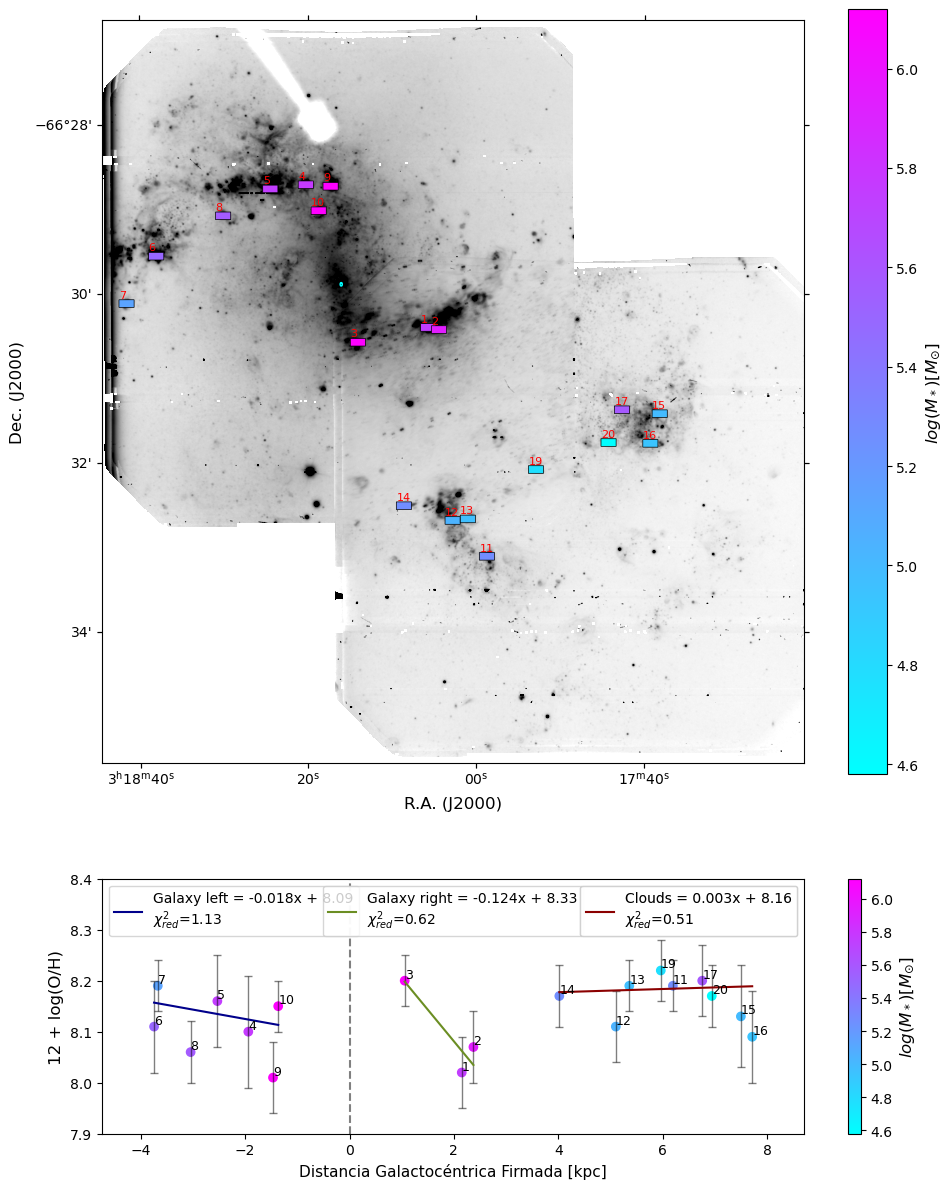

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Rectangle, Circle
from matplotlib.cm import ScalarMappable
from scipy.stats import chi2
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs

# Parámetro para las colorbars
color_param = 'mass'

param_labels = {
    'mass': '$log(M_*)[M_{\odot}]$',
    '12_LOG_OH_N2': '12 + log(O/H)',
    'age': 'Edad [Gyr]'
}

# Cargar datos
df_gradient = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_slits = pd.read_csv('output_scarano.csv')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')
df_gradient = pd.merge(df_gradient, df_signed, on='ID')

# Definir grupos
group_left = df_gradient[df_gradient['signed_distance_kpc'] < 0]
group_right_galaxy = df_gradient[(df_gradient['signed_distance_kpc'] >= 0) & (df_gradient['ID'].isin([1, 2, 3]))]
group_clouds = df_gradient[df_gradient['ID'].isin(range(11, 20))]

# Verificar número de puntos en cada grupo
print(f"Number of points in group_left: {len(group_left)}")
print(f"Number of points in group_right_galaxy: {len(group_right_galaxy)}")
print(f"Number of points in group_clouds: {len(group_clouds)}")

# Límites para la colorbar
vmin = df_gradient[color_param].min()
vmax = df_gradient[color_param].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.cool

# Parámetros de los slits
width_deg = 0.0075
height_deg = 0.0015
ra_center = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0002

# Cargar imágenes FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Enmascarar valores de bordes
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Reproyectar y combinar imágenes
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)
combined = np.nanmean([reproj1, reproj2], axis=0)
combined = np.where(combined > 0, combined, np.nan)

# Configurar figura
fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0], projection=new_wcs)
ax2 = fig.add_subplot(gs[1])

# Gráfico superior: imagen de la galaxia
ax1.imshow(combined, origin='lower', cmap='gray_r', norm=LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99)))
ax1.set_xlabel('R.A. (J2000)', fontsize=12)
ax1.set_ylabel('Dec. (J2000)', fontsize=12)

# Añadir slits
for _, row in df_slits.iterrows():
    ra, dec, slit_id = row['RA'], row['DEC'], row['ID']
    param_value = df_gradient[df_gradient['ID'] == slit_id][color_param].values
    if len(param_value) > 0:
        color = cmap(norm(param_value[0]))
    else:
        color = 'gray'
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='black', facecolor=color, lw=0.5,
        transform=ax1.get_transform('world')
    )
    ax1.add_patch(rect)
    ax1.text(
        ra + width_deg/2, dec + height_deg/2, str(int(slit_id)),
        color='red', fontsize=8, transform=ax1.get_transform('world'),
        va='bottom', ha='left'
    )

# Añadir círculo azul
circle = Circle(
    (ra_center, dec_center), circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=2,
    transform=ax1.get_transform('world')
)
ax1.add_patch(circle)
ax1.set_ylim(440, 3740)

# Barra de color para la imagen
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar1 = fig.colorbar(sm, ax=ax1)
cbar1.set_label(param_labels[color_param], fontsize=12)

# Gráfico inferior: gradiente galactocéntrico
x = df_gradient['signed_distance_kpc'].values
y = df_gradient['12_LOG_OH_N2'].values
sigma_y = df_gradient['12_LOG_OH_N2_ERR'].values

# Ajuste lineal ponderado para Lado Izquierdo
if len(group_left) > 1:
    x1 = group_left['signed_distance_kpc'].values
    y1 = group_left['12_LOG_OH_N2'].values
    sigma_y1 = group_left['12_LOG_OH_N2_ERR'].values
    weights1 = 1 / sigma_y1**2
    m1, b1 = np.polyfit(x1, y1, deg=1, w=weights1)
    y_pred1 = m1 * x1 + b1
    chi_squared1 = np.sum((y1 - y_pred1)**2 / sigma_y1**2)
    dof1 = len(x1) - 2
    reduced_chi_squared1 = chi_squared1 / dof1 if dof1 > 0 else np.nan
else:
    m1, b1, reduced_chi_squared1 = np.nan, np.nan, np.nan

# Ajuste lineal ponderado para Galaxia (Derecho)
if len(group_right_galaxy) > 1:
    x2 = group_right_galaxy['signed_distance_kpc'].values
    y2 = group_right_galaxy['12_LOG_OH_N2'].values
    sigma_y2 = group_right_galaxy['12_LOG_OH_N2_ERR'].values
    weights2 = 1 / sigma_y2**2
    m2, b2 = np.polyfit(x2, y2, deg=1, w=weights2)
    y_pred2 = m2 * x2 + b2
    chi_squared2 = np.sum((y2 - y_pred2)**2 / sigma_y2**2)
    dof2 = len(x2) - 2
    reduced_chi_squared2 = chi_squared2 / dof2 if dof2 > 0 else np.nan
else:
    m2, b2, reduced_chi_squared2 = np.nan, np.nan, np.nan

# Ajuste lineal ponderado para Nubes
if len(group_clouds) > 1:
    x3 = group_clouds['signed_distance_kpc'].values
    y3 = group_clouds['12_LOG_OH_N2'].values
    sigma_y3 = group_clouds['12_LOG_OH_N2_ERR'].values
    weights3 = 1 / sigma_y3**2
    m3, b3 = np.polyfit(x3, y3, deg=1, w=weights3)
    y_pred3 = m3 * x3 + b3
    chi_squared3 = np.sum((y3 - y_pred3)**2 / sigma_y3**2)
    dof3 = len(x3) - 2
    reduced_chi_squared3 = chi_squared3 / dof3 if dof3 > 0 else np.nan
else:
    m3, b3, reduced_chi_squared3 = np.nan, np.nan, np.nan

# Imprimir estadísticas
print("Lado Izquierdo (signed_distance_kpc < 0):")
print(f"Pendiente: {m1:.4f}" if not np.isnan(m1) else "Pendiente: N/A")
print(f"Intercepto: {b1:.4f}" if not np.isnan(b1) else "Intercepto: N/A")
print(f"Chi-cuadrado red.: {reduced_chi_squared1:.2f}" if not np.isnan(reduced_chi_squared1) else "Chi-cuadrado red.: N/A")
print("\nGalaxia (Derecho, IDs 1-3, signed_distance_kpc >= 0):")
print(f"Pendiente: {m2:.4f}" if not np.isnan(m2) else "Pendiente: N/A")
print(f"Intercepto: {b2:.4f}" if not np.isnan(b2) else "Intercepto: N/A")
print(f"Chi-cuadrado red.: {reduced_chi_squared2:.2f}" if not np.isnan(reduced_chi_squared2) else "Chi-cuadrado red.: N/A")
print("\nNubes (IDs 11-19):")
print(f"Pendiente: {m3:.4f}" if not np.isnan(m3) else "Pendiente: N/A")
print(f"Intercepto: {b3:.4f}" if not np.isnan(b3) else "Intercepto: N/A")
print(f"Chi-cuadrado red.: {reduced_chi_squared3:.2f}" if not np.isnan(reduced_chi_squared3) else "Chi-cuadrado red.: N/A")

# Barras de error
ax2.errorbar(x, y, yerr=sigma_y, fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter con colorbar
sc = ax2.scatter(x, y, c=df_gradient[color_param], cmap=cmap, vmin=vmin, vmax=vmax)

# Etiquetas de ID
for xi, yi, idi in zip(x, y, df_gradient['ID']):
    ax2.text(xi, yi, str(int(idi)), fontsize=9, ha='left', va='bottom')

# Líneas de regresión
if len(group_left) > 1 and not np.isnan(m1):
    x_fit1 = np.linspace(np.min(x1), np.max(x1), 100)
    y_fit1 = m1 * x_fit1 + b1
    line1, = ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Galaxy left = {m1:.3f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")

if len(group_right_galaxy) > 1 and not np.isnan(m2):
    x_fit2 = np.linspace(np.min(x2), np.max(x2), 100)
    y_fit2 = m2 * x_fit2 + b2
    line2, = ax2.plot(x_fit2, y_fit2, color='olivedrab', label=f"Galaxy right = {m2:.3f}x + {b2:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared2:.2f}")
    print(f"x_fit2 range: {np.min(x_fit2)} to {np.max(x_fit2)}")
    print(f"y_fit2 range: {np.min(y_fit2)} to {np.max(y_fit2)}")

if len(group_clouds) > 1 and not np.isnan(m3):
    x_fit3 = np.linspace(np.min(x3), np.max(x3), 100)
    y_fit3 = m3 * x_fit3 + b3
    line3, = ax2.plot(x_fit3, y_fit3, color='darkred', label=f"Clouds = {m3:.3f}x + {b3:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared3:.2f}")

# Línea vertical en x=0
ax2.axvline(0, linestyle='--', color='gray')

# Leyendas
if len(group_left) > 1 and not np.isnan(m1):
    legend1 = ax2.legend(handles=[line1], loc='upper left')
    ax2.add_artist(legend1)
if len(group_right_galaxy) > 1 and not np.isnan(m2):
    legend2 = ax2.legend(handles=[line2], loc='upper center')
    ax2.add_artist(legend2)
if len(group_clouds) > 1 and not np.isnan(m3):
    legend3 = ax2.legend(handles=[line3], loc='upper right')
    ax2.add_artist(legend3)

ax2.set_xlabel('Distancia Galactocéntrica Firmada [kpc]', fontsize=11)
ax2.set_ylabel('12 + log(O/H)', fontsize=12)
ax2.set_xlim(np.min(x) - 1, np.max(x) + 1)
ax2.set_ylim(7.9, 8.4)

# Barra de color para el gradiente
cbar2 = fig.colorbar(sc, ax=ax2)
cbar2.set_label(param_labels[color_param], fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:193: SyntaxWarning: invalid escape sequence '\c'
<>:198: SyntaxWarning: invalid escape sequence '\c'
<>:205: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:193: SyntaxWarning: invalid escape sequence '\c'
<>:198: SyntaxWarning: invalid escape sequence '\c'
<>:205: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/2911489070.py:17: SyntaxWarning: invalid escape sequence '\o'
  'mass': '$log(M_*)[M_{\odot}]$',
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/2911489070.py:193: SyntaxWarning: invalid escape sequence '\c'
  line1, = ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Galaxy left = {m1:.3f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/2911489070.py:198: SyntaxWarning: invalid escape sequence '\c'
  line2, = ax2.plot(x_fit2, y_

Number of points in group_left: 7
Number of points in group_right_galaxy: 3
Number of points in group_clouds: 8


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/2911489070.py:68: RuntimeWarning: Mean of empty slice
  combined = np.nanmean([reproj1, reproj2], axis=0)


Lado Izquierdo (signed_distance_kpc < 0):
Pendiente: -0.0184
Intercepto: 8.0882
Chi-cuadrado red.: 1.13

Galaxia (Derecho, IDs 1-3, signed_distance_kpc >= 0):
Pendiente: -0.1240
Intercepto: 8.3292
Chi-cuadrado red.: 0.62

Nubes (IDs 11-19):
Pendiente: 0.0031
Intercepto: 8.1649
Chi-cuadrado red.: 0.51
x_fit2 range: 1.0566975100962768 to 2.373826515813847
y_fit2 range: 8.034734832357858 to 8.198122478059666


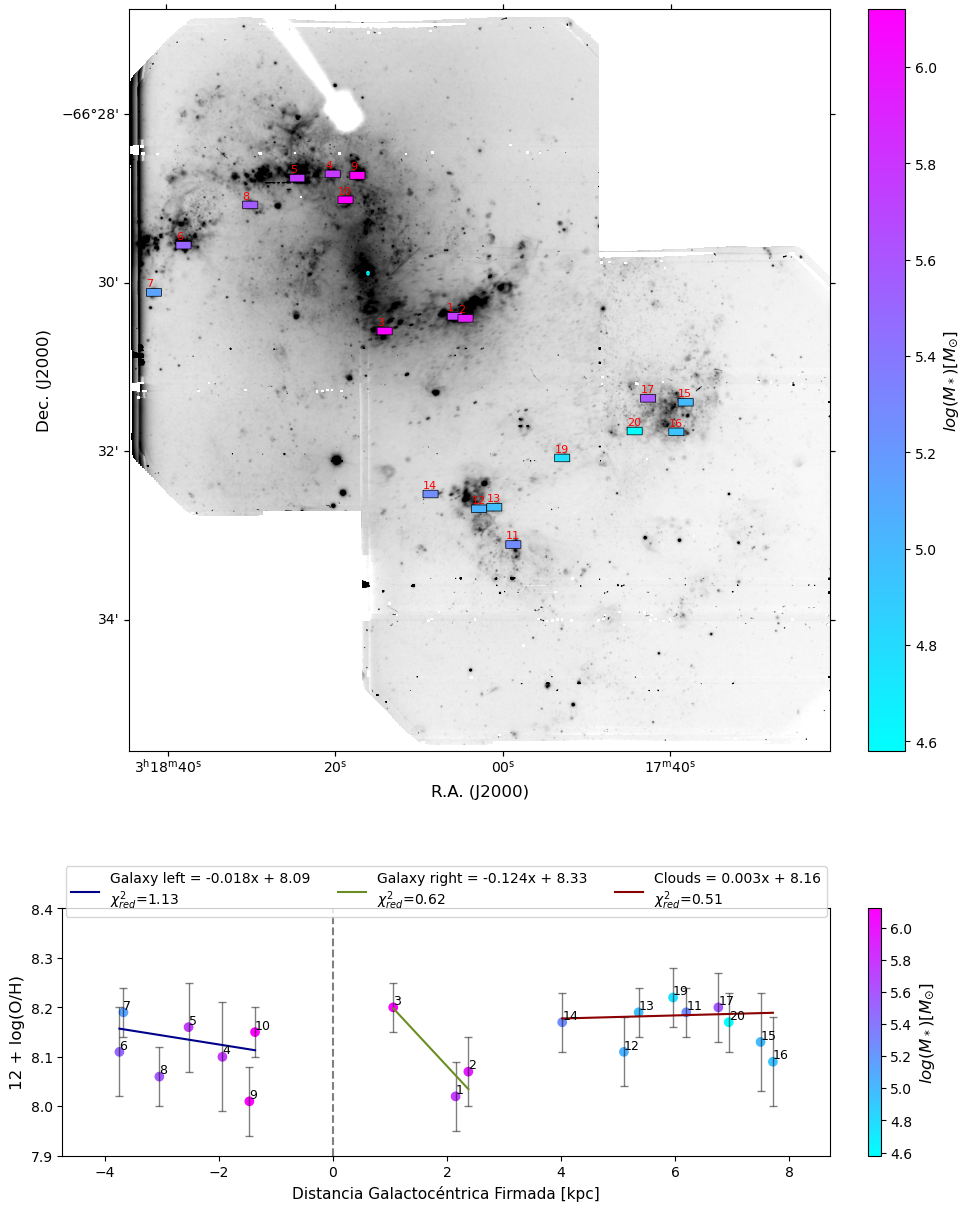

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Rectangle, Circle
from matplotlib.cm import ScalarMappable
from scipy.stats import chi2
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Rectangle, Circle
from matplotlib.cm import ScalarMappable
from scipy.stats import chi2
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs

In [6]:

# Cargar datos
df_gradient = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')
df_slits = pd.read_csv('output_scarano.csv')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')
df_gradient = pd.merge(df_gradient, df_signed, on='ID')

In [7]:


# Definir grupos
group_left = df_gradient[df_gradient['signed_distance_kpc'] < 0]
group_right_galaxy = df_gradient[(df_gradient['signed_distance_kpc'] >= 0) & (df_gradient['ID'].isin([1, 2, 3]))]
group_clouds = df_gradient[df_gradient['ID'].isin(range(11, 20))]


In [8]:

# Verificar número de puntos en cada grupo
print(f"Number of points in group_left: {len(group_left)}")
print(f"Number of points in group_right_galaxy: {len(group_right_galaxy)}")
print(f"Number of points in group_clouds: {len(group_clouds)}")

Number of points in group_left: 7
Number of points in group_right_galaxy: 3
Number of points in group_clouds: 8


In [9]:
# Parámetros de los slits
width_deg = 0.0075
height_deg = 0.0015
ra_center = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0002

In [11]:

# Cargar imágenes FITS
hdul1 = fits.open('../../../reduccion/mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../../../reduccion/mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [12]:
# Enmascarar valores de bordes
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

In [13]:
# Parámetro para las colorbars
color_param = 'mass'

param_labels = {
    'mass': '$log(M_*)[M_{\odot}]$',
    '12_LOG_OH_N2': '12 + log(O/H)',
    'age': 'Edad [Gyr]'
}

# Límites para la colorbar
vmin = df_gradient[color_param].min()
vmax = df_gradient[color_param].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.cool


# Reproyectar y combinar imágenes
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)
combined = np.nanmean([reproj1, reproj2], axis=0)
combined = np.where(combined > 0, combined, np.nan)


<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/3882753020.py:5: SyntaxWarning: invalid escape sequence '\o'
  'mass': '$log(M_*)[M_{\odot}]$',
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/3882753020.py:21: RuntimeWarning: Mean of empty slice
  combined = np.nanmean([reproj1, reproj2], axis=0)


<>:122: SyntaxWarning: invalid escape sequence '\c'
<>:127: SyntaxWarning: invalid escape sequence '\c'
<>:134: SyntaxWarning: invalid escape sequence '\c'
<>:122: SyntaxWarning: invalid escape sequence '\c'
<>:127: SyntaxWarning: invalid escape sequence '\c'
<>:134: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/4290513232.py:122: SyntaxWarning: invalid escape sequence '\c'
  line1, = ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Left = {m1:.3f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/4290513232.py:127: SyntaxWarning: invalid escape sequence '\c'
  line2, = ax2.plot(x_fit2, y_fit2, color='olivedrab', label=f"Right = {m2:.3f}x + {b2:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared2:.2f}")
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_811/4290513232.py:134: SyntaxWarning: invalid escape sequence '\c'
  line3, = ax2.plot(x_fit3, y_fit3

Lado Izquierdo (signed_distance_kpc < 0):
Pendiente: -0.0184
Intercepto: 8.0882
Chi-cuadrado red.: 1.13

Galaxia (Derecho, IDs 1-3, signed_distance_kpc >= 0):
Pendiente: -0.1240
Intercepto: 8.3292
Chi-cuadrado red.: 0.62

Nubes (IDs 11-19):
Pendiente: 0.0031
Intercepto: 8.1649
Chi-cuadrado red.: 0.51
x_fit2 range: 1.0566975100962768 to 2.373826515813847
y_fit2 range: 8.034734832357858 to 8.198122478059666


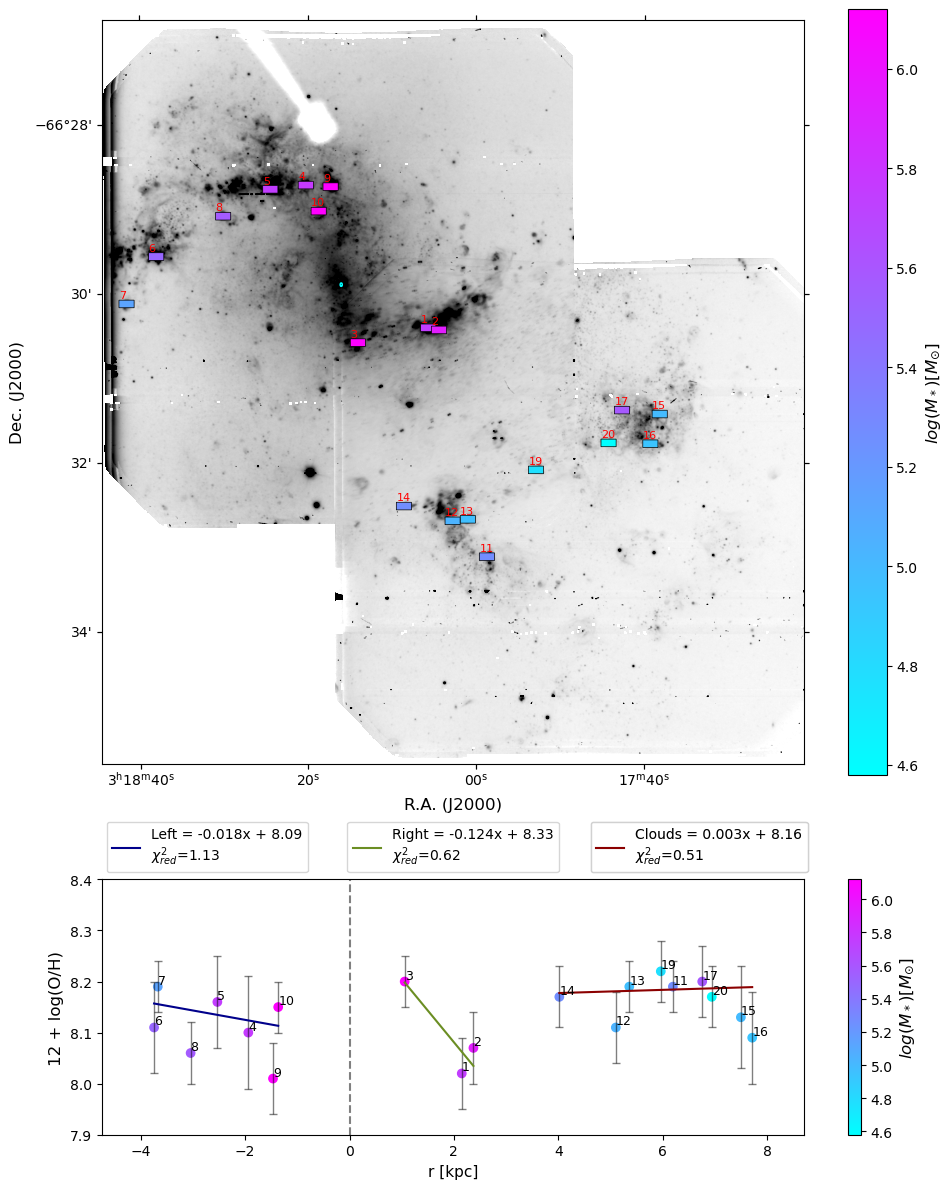

In [15]:
fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0], projection=new_wcs)
ax2 = fig.add_subplot(gs[1])

# Gráfico superior: imagen de la galaxia
ax1.imshow(combined, origin='lower', cmap='gray_r', norm=LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99)))
ax1.set_xlabel('R.A. (J2000)', fontsize=12)
ax1.set_ylabel('Dec. (J2000)', fontsize=12)

# Añadir slits
for _, row in df_slits.iterrows():
    ra, dec, slit_id = row['RA'], row['DEC'], row['ID']
    param_value = df_gradient[df_gradient['ID'] == slit_id][color_param].values
    if len(param_value) > 0:
        color = cmap(norm(param_value[0]))
    else:
        color = 'gray'
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='black', facecolor=color, lw=0.5,
        transform=ax1.get_transform('world')
    )
    ax1.add_patch(rect)
    ax1.text(
        ra + width_deg/2, dec + height_deg/2, str(int(slit_id)),
        color='red', fontsize=8, transform=ax1.get_transform('world'),
        va='bottom', ha='left'
    )

# Añadir círculo azul
circle = Circle(
    (ra_center, dec_center), circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=2,
    transform=ax1.get_transform('world')
)
ax1.add_patch(circle)
ax1.set_ylim(440, 3740)

# Barra de color para la imagen
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar1 = fig.colorbar(sm, ax=ax1)
cbar1.set_label(param_labels[color_param], fontsize=12)

# Gráfico inferior: gradiente galactocéntrico
x = df_gradient['signed_distance_kpc'].values
y = df_gradient['12_LOG_OH_N2'].values
sigma_y = df_gradient['12_LOG_OH_N2_ERR'].values

# Ajuste lineal ponderado para Lado Izquierdo
if len(group_left) > 1:
    x1 = group_left['signed_distance_kpc'].values
    y1 = group_left['12_LOG_OH_N2'].values
    sigma_y1 = group_left['12_LOG_OH_N2_ERR'].values
    weights1 = 1 / sigma_y1**2
    m1, b1 = np.polyfit(x1, y1, deg=1, w=weights1)
    y_pred1 = m1 * x1 + b1
    chi_squared1 = np.sum((y1 - y_pred1)**2 / sigma_y1**2)
    dof1 = len(x1) - 2
    reduced_chi_squared1 = chi_squared1 / dof1 if dof1 > 0 else np.nan
else:
    m1, b1, reduced_chi_squared1 = np.nan, np.nan, np.nan

# Ajuste lineal ponderado para Galaxia (Derecho)
if len(group_right_galaxy) > 1:
    x2 = group_right_galaxy['signed_distance_kpc'].values
    y2 = group_right_galaxy['12_LOG_OH_N2'].values
    sigma_y2 = group_right_galaxy['12_LOG_OH_N2_ERR'].values
    weights2 = 1 / sigma_y2**2
    m2, b2 = np.polyfit(x2, y2, deg=1, w=weights2)
    y_pred2 = m2 * x2 + b2
    chi_squared2 = np.sum((y2 - y_pred2)**2 / sigma_y2**2)
    dof2 = len(x2) - 2
    reduced_chi_squared2 = chi_squared2 / dof2 if dof2 > 0 else np.nan
else:
    m2, b2, reduced_chi_squared2 = np.nan, np.nan, np.nan

# Ajuste lineal ponderado para Nubes
if len(group_clouds) > 1:
    x3 = group_clouds['signed_distance_kpc'].values
    y3 = group_clouds['12_LOG_OH_N2'].values
    sigma_y3 = group_clouds['12_LOG_OH_N2_ERR'].values
    weights3 = 1 / sigma_y3**2
    m3, b3 = np.polyfit(x3, y3, deg=1, w=weights3)
    y_pred3 = m3 * x3 + b3
    chi_squared3 = np.sum((y3 - y_pred3)**2 / sigma_y3**2)
    dof3 = len(x3) - 2
    reduced_chi_squared3 = chi_squared3 / dof3 if dof3 > 0 else np.nan
else:
    m3, b3, reduced_chi_squared3 = np.nan, np.nan, np.nan

# Imprimir estadísticas
print("Lado Izquierdo (signed_distance_kpc < 0):")
print(f"Pendiente: {m1:.4f}" if not np.isnan(m1) else "Pendiente: N/A")
print(f"Intercepto: {b1:.4f}" if not np.isnan(b1) else "Intercepto: N/A")
print(f"Chi-cuadrado red.: {reduced_chi_squared1:.2f}" if not np.isnan(reduced_chi_squared1) else "Chi-cuadrado red.: N/A")
print("\nGalaxia (Derecho, IDs 1-3, signed_distance_kpc >= 0):")
print(f"Pendiente: {m2:.4f}" if not np.isnan(m2) else "Pendiente: N/A")
print(f"Intercepto: {b2:.4f}" if not np.isnan(b2) else "Intercepto: N/A")
print(f"Chi-cuadrado red.: {reduced_chi_squared2:.2f}" if not np.isnan(reduced_chi_squared2) else "Chi-cuadrado red.: N/A")
print("\nNubes (IDs 11-19):")
print(f"Pendiente: {m3:.4f}" if not np.isnan(m3) else "Pendiente: N/A")
print(f"Intercepto: {b3:.4f}" if not np.isnan(b3) else "Intercepto: N/A")
print(f"Chi-cuadrado red.: {reduced_chi_squared3:.2f}" if not np.isnan(reduced_chi_squared3) else "Chi-cuadrado red.: N/A")

# Barras de error
ax2.errorbar(x, y, yerr=sigma_y, fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter con colorbar
sc = ax2.scatter(x, y, c=df_gradient[color_param], cmap=cmap, vmin=vmin, vmax=vmax)

# Etiquetas de ID
for xi, yi, idi in zip(x, y, df_gradient['ID']):
    ax2.text(xi, yi, str(int(idi)), fontsize=9, ha='left', va='bottom')

# Líneas de regresión
if len(group_left) > 1 and not np.isnan(m1):
    x_fit1 = np.linspace(np.min(x1), np.max(x1), 100)
    y_fit1 = m1 * x_fit1 + b1
    line1, = ax2.plot(x_fit1, y_fit1, color='darkblue', label=f"Left = {m1:.3f}x + {b1:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared1:.2f}")

if len(group_right_galaxy) > 1 and not np.isnan(m2):
    x_fit2 = np.linspace(np.min(x2), np.max(x2), 100)
    y_fit2 = m2 * x_fit2 + b2
    line2, = ax2.plot(x_fit2, y_fit2, color='olivedrab', label=f"Right = {m2:.3f}x + {b2:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared2:.2f}")
    print(f"x_fit2 range: {np.min(x_fit2)} to {np.max(x_fit2)}")
    print(f"y_fit2 range: {np.min(y_fit2)} to {np.max(y_fit2)}")

if len(group_clouds) > 1 and not np.isnan(m3):
    x_fit3 = np.linspace(np.min(x3), np.max(x3), 100)
    y_fit3 = m3 * x_fit3 + b3
    line3, = ax2.plot(x_fit3, y_fit3, color='darkred', label=f"Clouds = {m3:.3f}x + {b3:.2f}\n$\chi^2_{{red}}$={reduced_chi_squared3:.2f}")

# Línea vertical en x=0
ax2.axvline(0, linestyle='--', color='gray')

# Leyendas
if len(group_left) > 1 and not np.isnan(m1):
    legend1 = ax2.legend(handles=[line1], loc='lower center', bbox_to_anchor=(0.15, 1.0))
    ax2.add_artist(legend1)
if len(group_right_galaxy) > 1 and not np.isnan(m2):
    legend2 = ax2.legend(handles=[line2], loc='lower center', bbox_to_anchor=(0.5, 1.0))
    ax2.add_artist(legend2)
if len(group_clouds) > 1 and not np.isnan(m3):
    legend3 = ax2.legend(handles=[line3], loc='lower center', bbox_to_anchor=(0.85, 1.0))
    ax2.add_artist(legend3)

ax2.set_xlabel('r [kpc]', fontsize=11)
ax2.set_ylabel('12 + log(O/H)', fontsize=12)
ax2.set_xlim(np.min(x) - 1, np.max(x) + 1)
ax2.set_ylim(7.9, 8.4)

# Barra de color para el gradiente
cbar2 = fig.colorbar(sc, ax=ax2)
cbar2.set_label(param_labels[color_param], fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()